<h1> Agriculture Activity Dataset </h1>

<h2> Loading the required packages. </h2>

In [1]:
library(tidyverse)
library(visdat)
library(readr)
library(skimr)
library(magrittr)
library(purrr) 
library(glue)
library(stringr)
library(rvest)
library(httr)
library(jsonlite)
library(XML)
library(xml2)
library(highcharter)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding



Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten


Registered S3 method overwritten by 'quant

<h2> Creating functions to get data using API(s) </h2>

In [2]:
# A function to get data from the Ministry for the Environment database API

get_data_from_mfe <- function(api_key, data_id){
    
    query <- glue('https://data.mfe.govt.nz/services;key={api_key}/wfs?service=WFS&version=2.0.0&request=GetFeature&typeNames={data_id}') # creates a query url using inputs of api key and data-id number available on MfE website
    
    api_response <- GET(query) #gets the API response from the query
    
    data_xml <- read_xml(api_response) #reads the xml data from the api response
    
    data_parsed <- xmlParse(data_xml) #parses the data into an xml format that is readable in R
    
    data_df <- glue('//data.mfe.govt.nz:{data_id}') %>%  # creating a node name to look for
    getNodeSet(data_parsed, .)  %>%  # looking at nodes with the name
    xmlToDataFrame(nodes = .) #turns the data within the given node into a data frame
    
    return(data_df) #returns the data frame
}

<h2> Reading all the dataset in a csv format </h2>

In [3]:
horti_info <- read_csv("https://raw.githubusercontent.com/beuri97/data201_gp/agri-activity/data/hort_data_info.csv")

New names:
• `` -> `...2`
• `` -> `...3`
Rows: 9 Columns: 3
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Legend/Légende, ...2, ...3

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
horti_pop <- read_csv("https://raw.githubusercontent.com/beuri97/data201_gp/agri-activity/data/hort_pop_regional.csv")

Rows: 1447 Columns: 5
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Horticulture, Area, Year, Flags
dbl (1): Value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
livestock_info <- read_csv("https://raw.githubusercontent.com/beuri97/data201_gp/agri-activity/data/livestock_data_info.csv")

New names:
• `` -> `...2`
• `` -> `...3`
Rows: 9 Columns: 3
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Legend/Légende, ...2, ...3

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
livestock_pop <- read_csv("https://raw.githubusercontent.com/beuri97/data201_gp/agri-activity/data/livestock_pop_regional.csv")

Rows: 4231 Columns: 5
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Livestock, Area, Year, Flags
dbl (1): Value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


<h2>  Visualization of any missing values in our datasets </h2>

The **vis_miss()** function returns at a glance of any missing values inside the dataframe.

The **vis_dat()** Returns a color coordinated ggplot according to its classes (elements) and if any missing values are present

<h3> For horti_info dataset </h3>

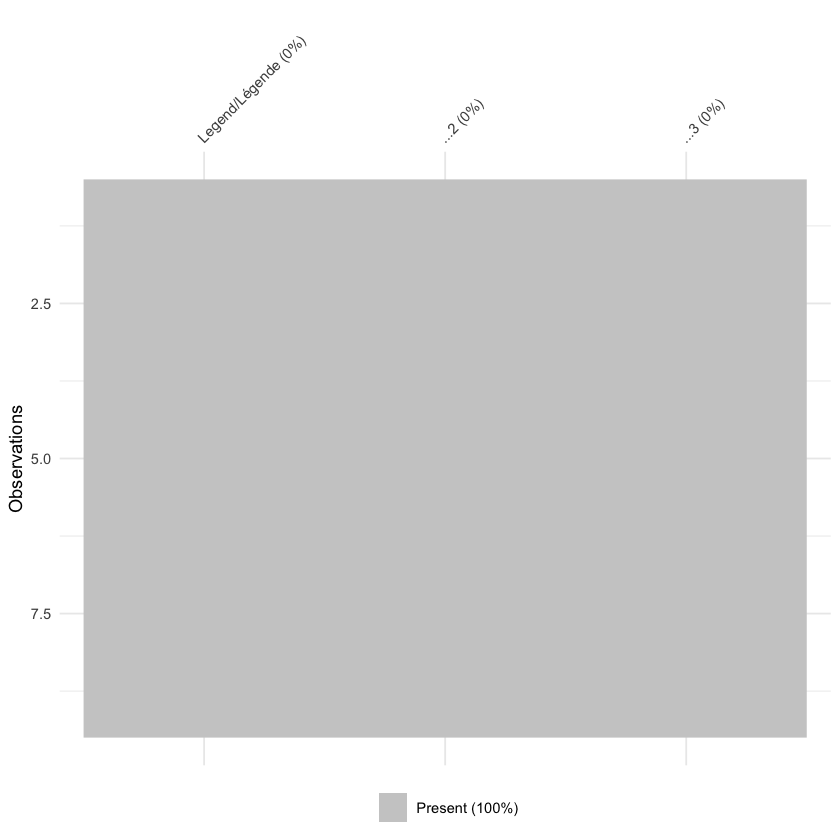

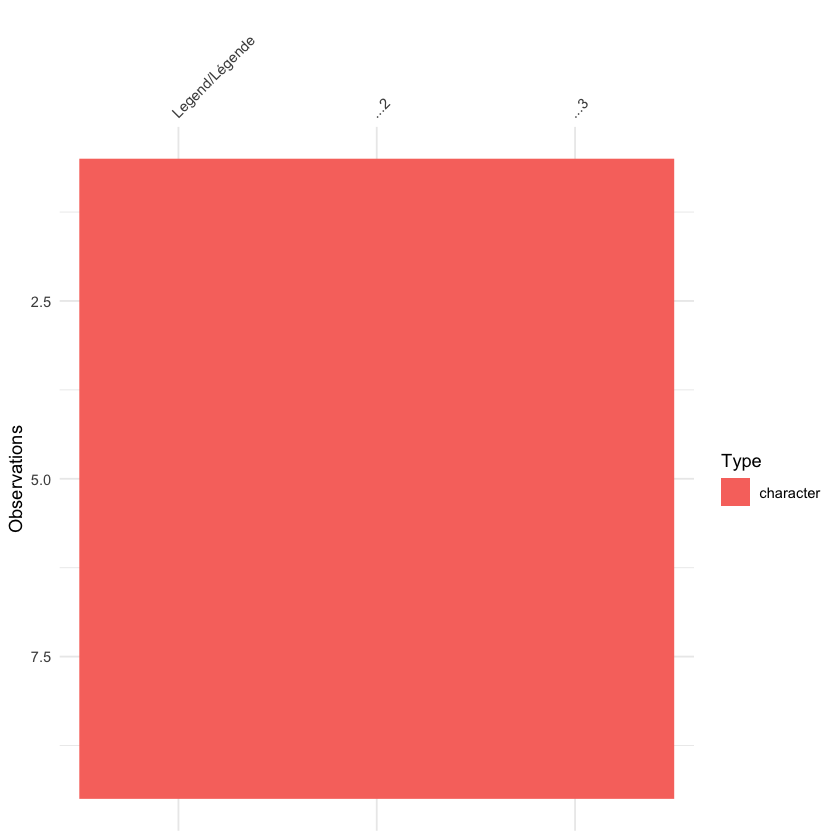

In [7]:
vis_miss(horti_info)   # return any missing values inside the dataframe
vis_dat(horti_info)    # returns color coordinated ggplot according to its classes (elements) and if any missing values are present

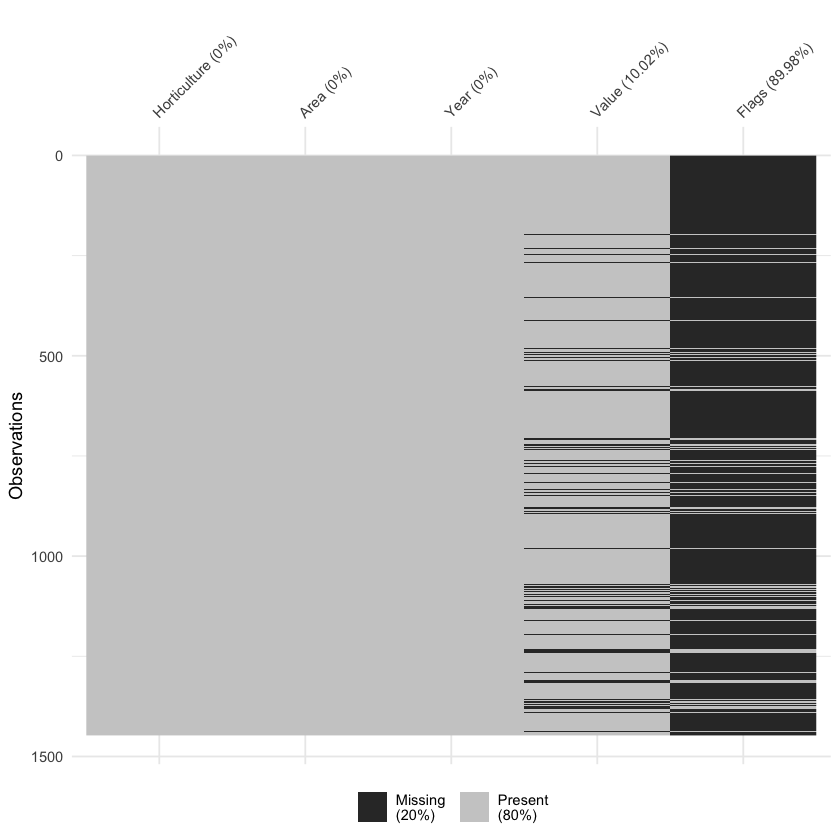

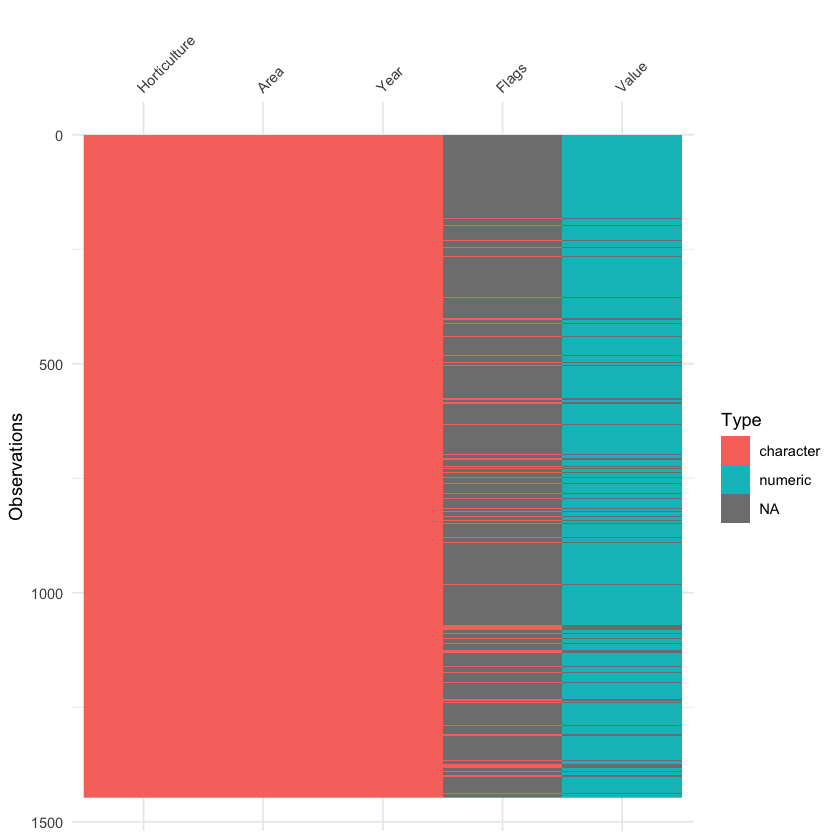

In [8]:
vis_miss(horti_pop) # return any missing values inside the dataframe
vis_dat(horti_pop)  # returns color coordinated ggplot according to its classes (elements) and if any missing values are present

<h3> For livestock_info dataset </h3>

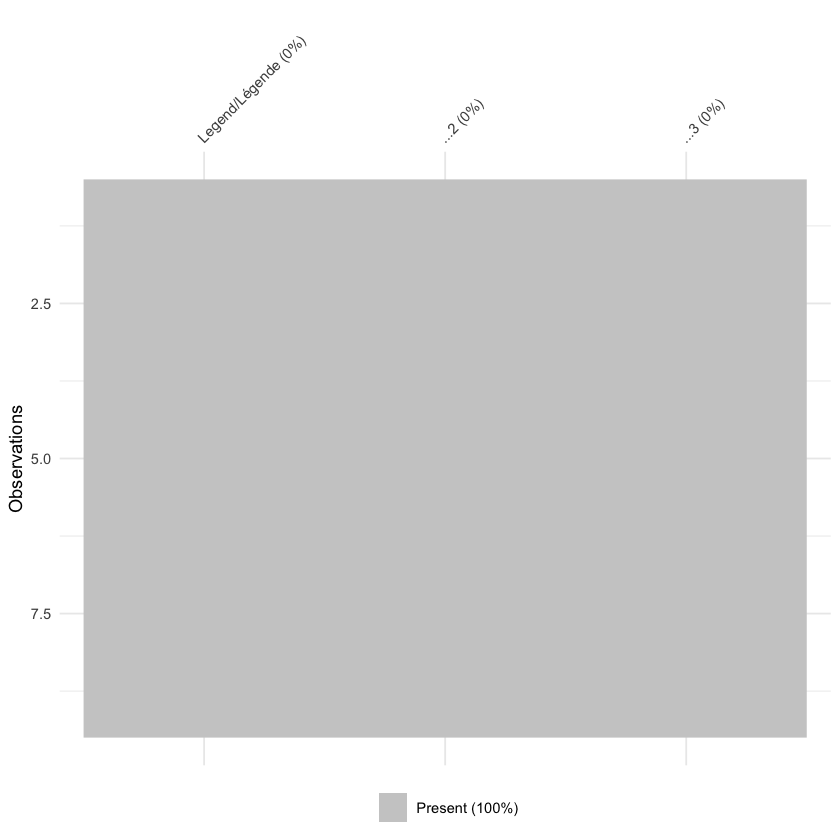

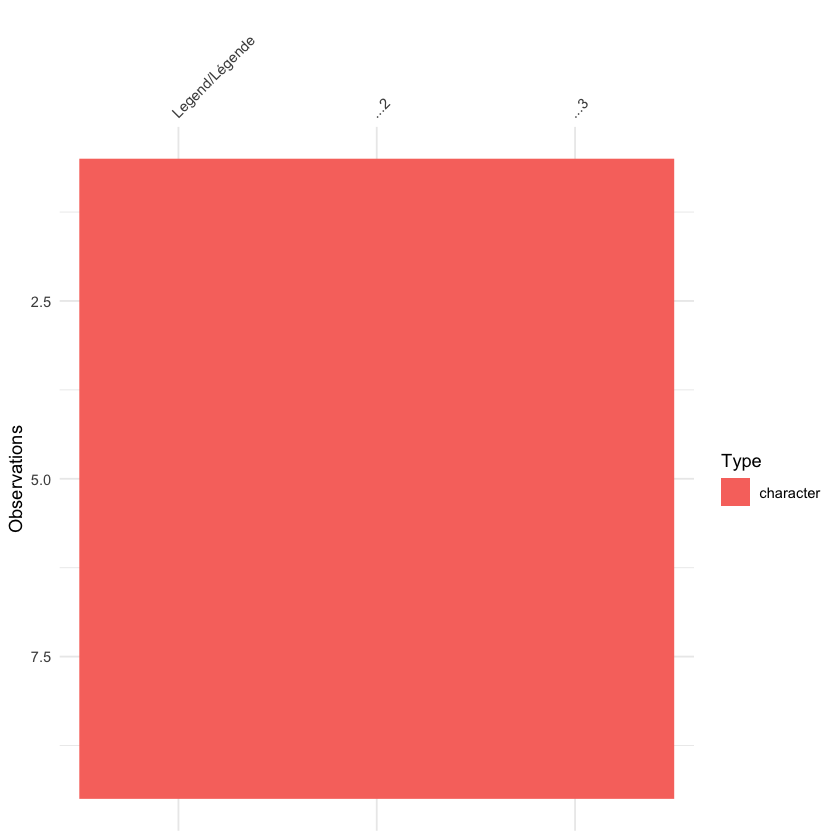

In [9]:
vis_miss(livestock_info) # return any missing values inside the dataframe
vis_dat(livestock_info)  # returns color coordinated ggplot according to its classes (elements) and if any missing values are present

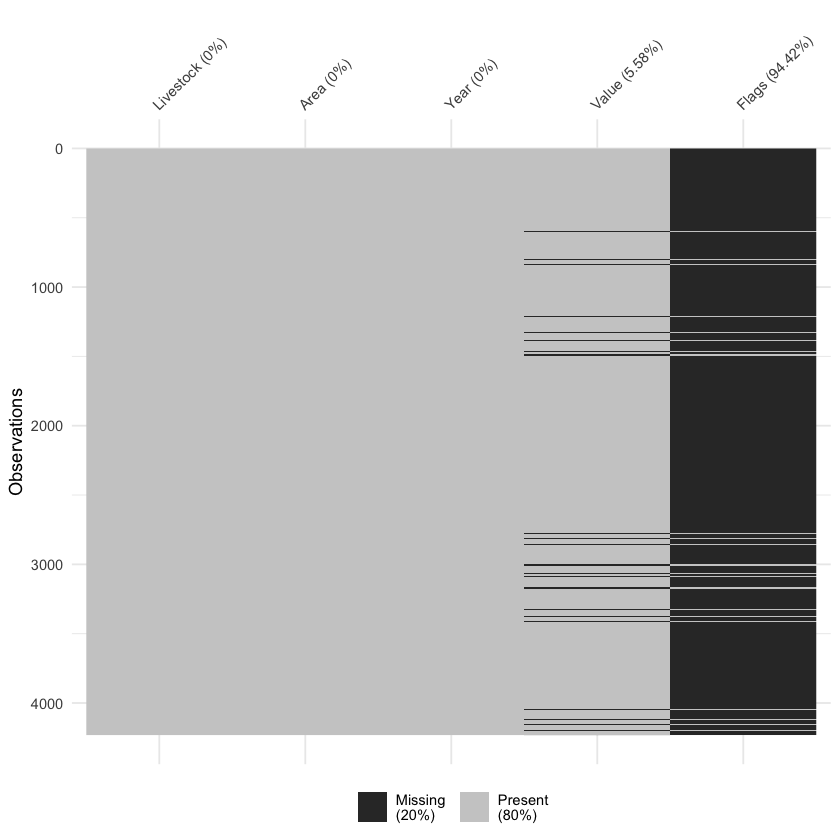

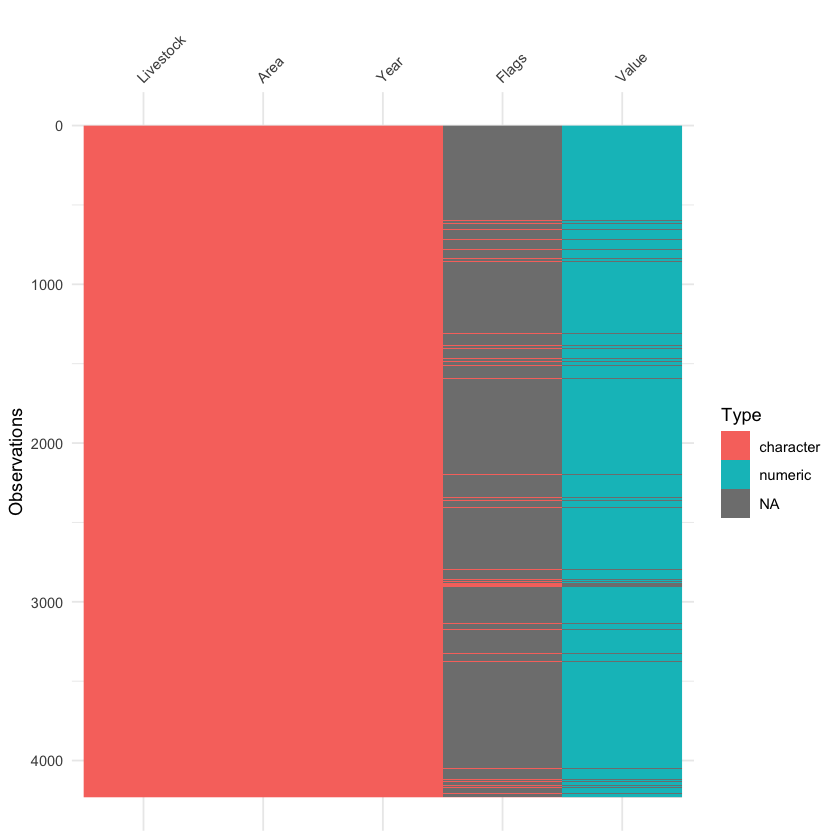

In [10]:
vis_miss(livestock_pop) # return any missing values inside the dataframe
vis_dat(livestock_pop)  # returns color coordinated ggplot according to its classes (elements) and if any missing values are present

<h2>  Removing any identified NAs in our datasets. </h2>

<h3> For horti_pop Dataset </h3>

In [11]:
# Dropping all NAs in the column Value from "horti_pop" dataset
new_horti_pop <- horti_pop %>%
  drop_na(Value)               # drop_na() function drop any rows that contains missing values                

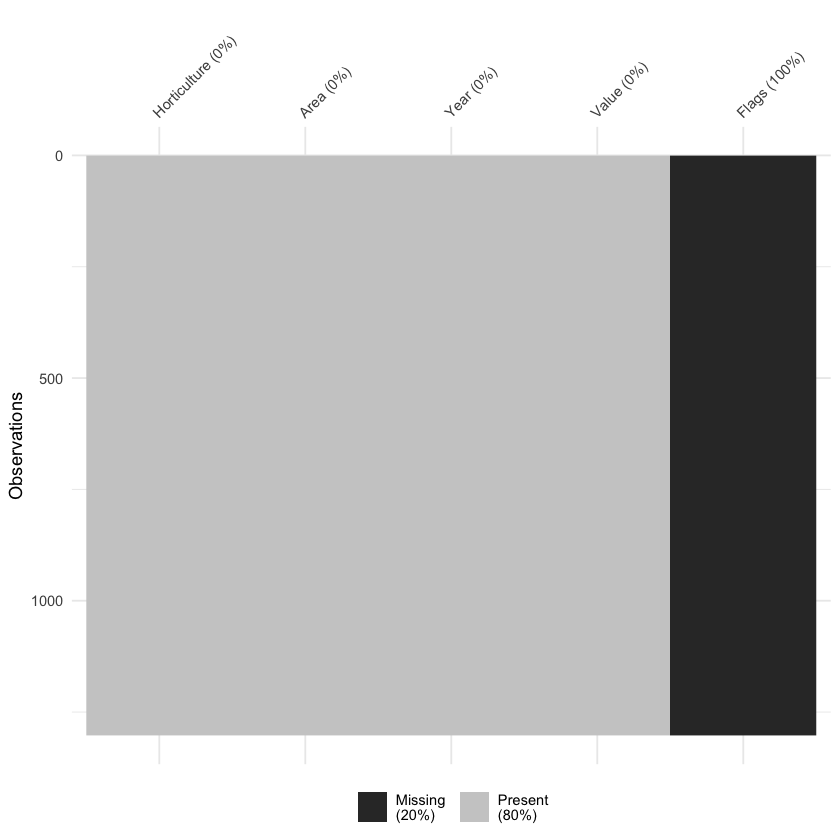

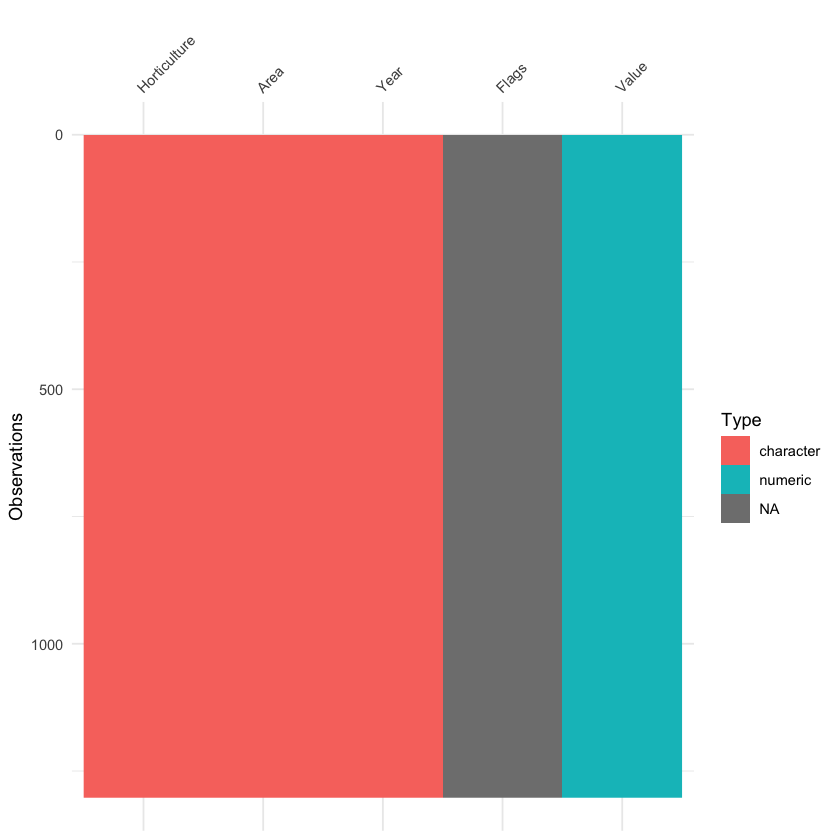

In [12]:
# Help visualize any missing values
vis_miss(new_horti_pop)  # return any missing values inside the dataframe
vis_dat(new_horti_pop) # returns color coordinated ggplot according to its classes (elements) and if any missing values are present

In [13]:
# Removing the column "FLags" as it only contains NA values
latest_horti_pop <- subset(new_horti_pop, select = -Flags)  

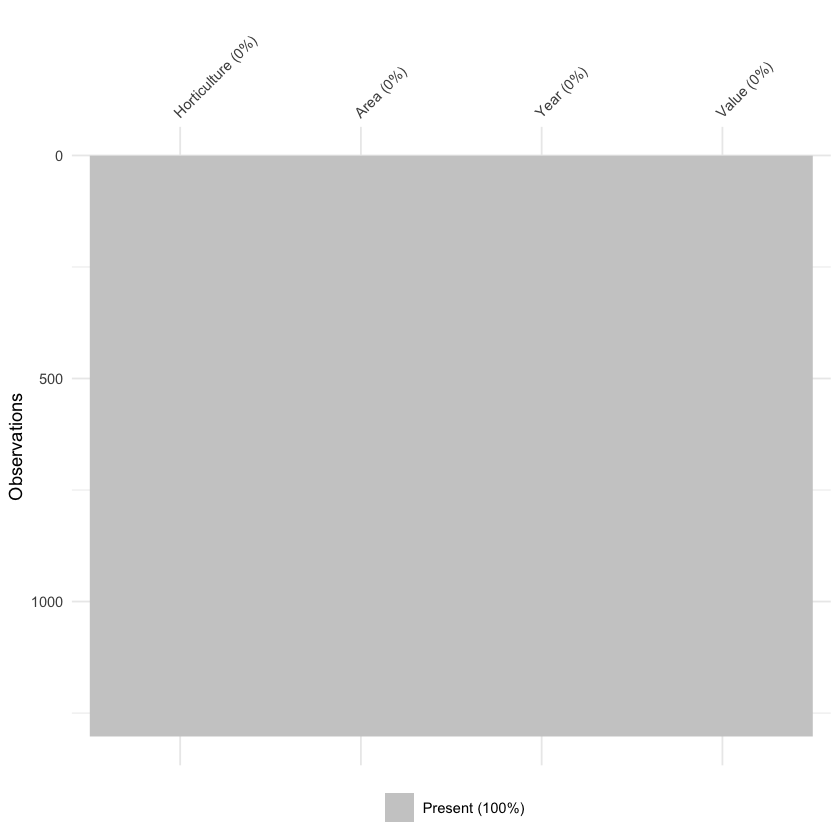

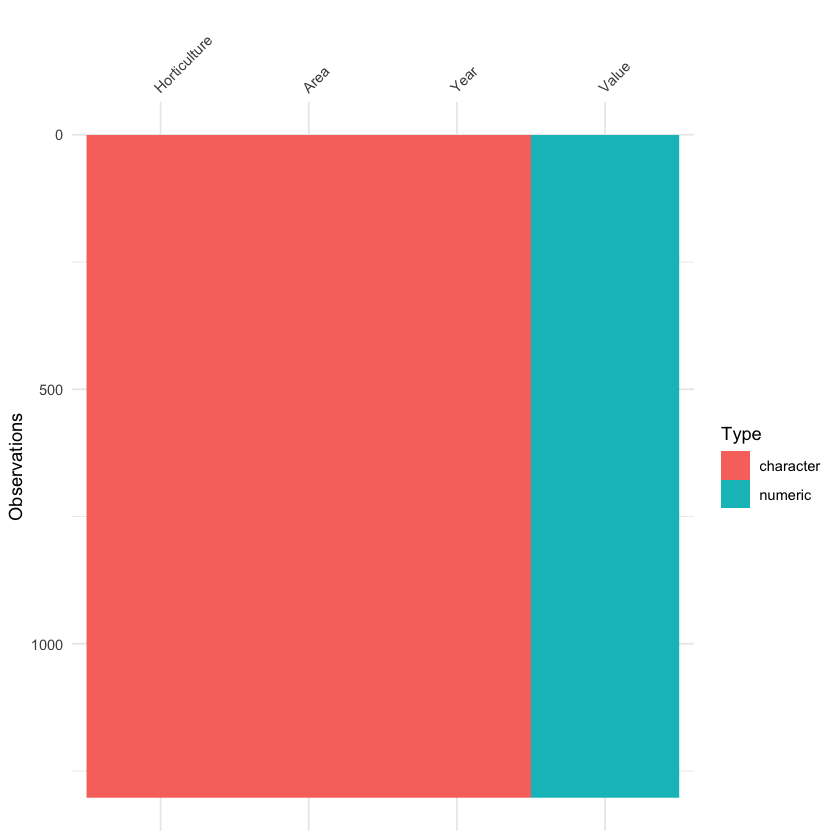

In [14]:
# Double checking if any NAs are still present
vis_miss(latest_horti_pop)  # return any missing values inside the dataframe
vis_dat(latest_horti_pop) # returns color coordinated ggplot according to its classes (elements) and if any missing values are present

<h3> For livestock_pop Dataset </h3>

In [15]:
#Dropping all NAs in the column Value from "livestock_pop" dataset
new_livestock_pop <- livestock_pop %>%
  drop_na(Value)                        # Drops NAs 

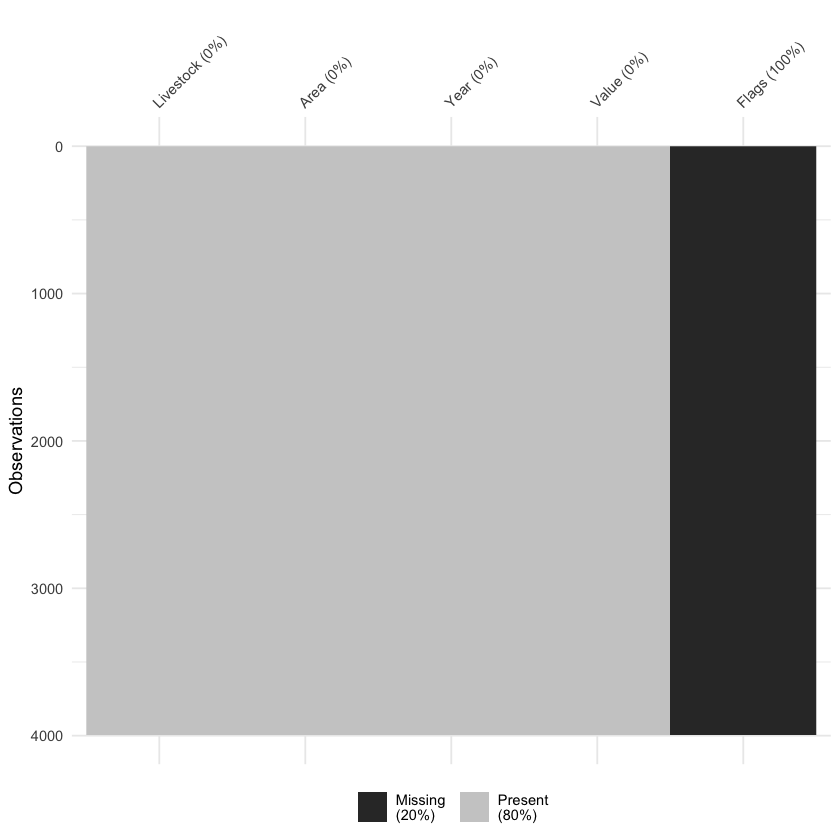

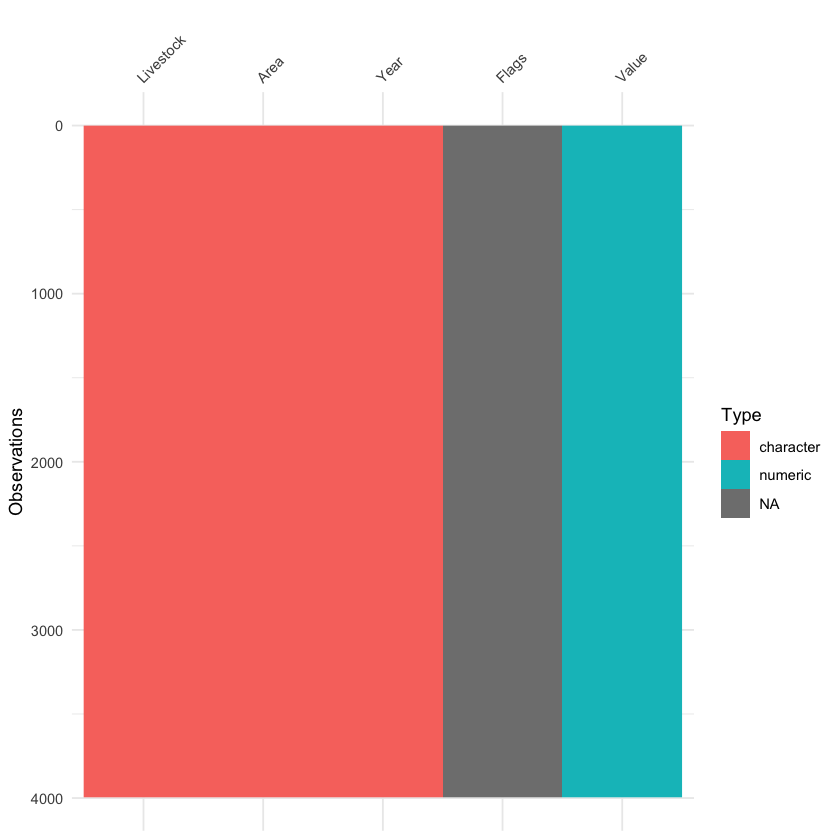

In [16]:
vis_miss(new_livestock_pop) # return any missing values inside the dataframe
vis_dat(new_livestock_pop)  # returns color coordinated ggplot according to its classes (elements) and if any missing values are present

In [17]:
# Removing the column "FLags" as it only contains NA values
latest_livestock_pop <- subset(new_livestock_pop, select = -Flags)  # subset() functions helps filter any unwanted variables

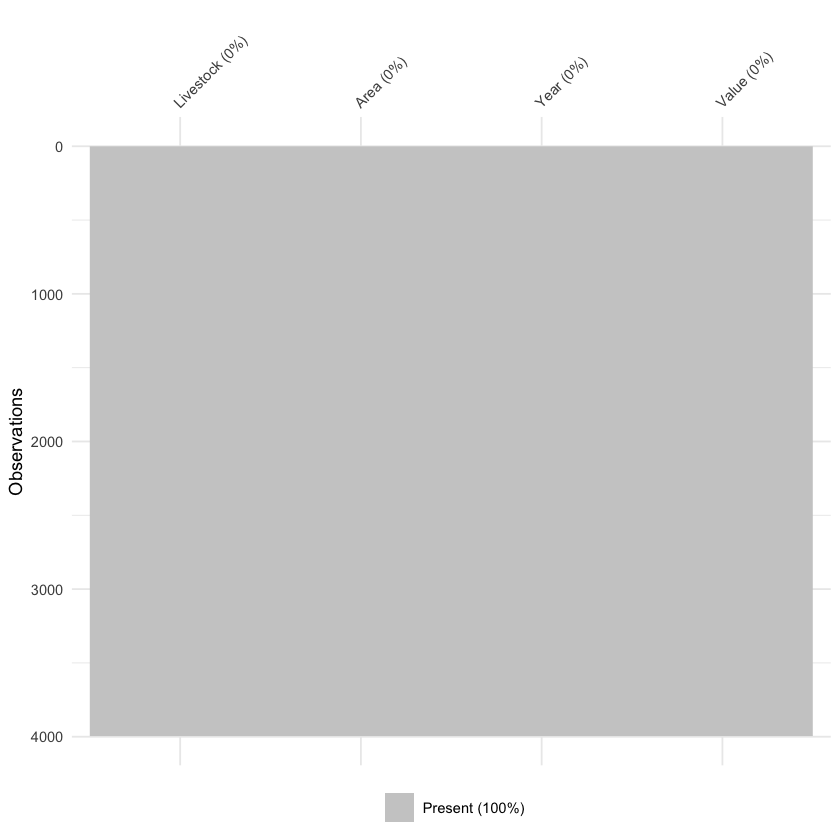

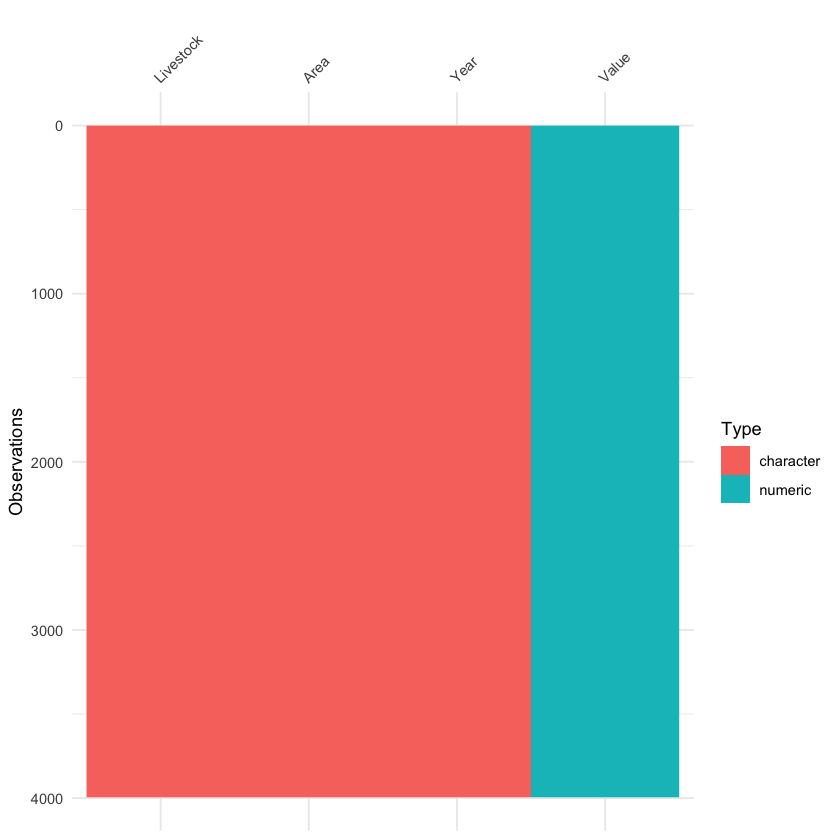

In [18]:
# Double checking if any NAs are still present
vis_miss(latest_livestock_pop) # return any missing values inside the dataframe
vis_dat(latest_livestock_pop) # returns color coordinated ggplot according to its classes (elements) and if any missing values are present

<h2> Manipulating the format of the Dates, Renaming few variables, Filtering specific variables, etc. </h2>

<h3> For horti_pop Dataset </h3>

In [19]:
# This removes the wording "As at" in our dataset specifically at Years column
latest_horti_pop$Year <- gsub("As at ", "", as.character(latest_horti_pop$Year))   # gsub() function replaces specified strings with a new input values

In [20]:
# Standardizing dates
test <- latest_horti_pop %>% 
  filter(!startsWith(latest_horti_pop$Year, "June 30")) %>%  # filters to check that all dates start with 30th of June
  head() # shows first few rows

test

Horticulture,Area,Year,Value
<chr>,<chr>,<chr>,<dbl>


All observations were made as at June 30 of each year. Therefore, month and day is irrelevant and can be removed.

In [21]:
latest_horti_pop$Year <- gsub("June 30 ", "", as.character(latest_horti_pop$Year))     # gsub() function replaces specified strings with a new input values

In [22]:
# Turning the Year from character to numeric
latest_horti_pop$Year <- as.numeric(as.character(latest_horti_pop$Year))   # transforming column Year from character to numeric

In [23]:
# Removing irrelevant datas by using the filter() function
latest_horti_pop <- latest_horti_pop %>% 
  filter(Area != "Total New Zealand") %>%      # filtering unwanted areas
  filter(Area != "Total North Island") %>%     # filtering unwanted areas
  filter(Area != "Total South Island")         # filtering unwanted areas



In [24]:
# Renames the column Value to Total_Livestock by using rename() function
latest_horti_pop <- latest_horti_pop %>%   # creating new variable
  rename(Activity = "Horticulture")        # renaming columns

latest_horti_pop

Activity,Area,Year,Value
<chr>,<chr>,<dbl>,<dbl>
Total apples (hectares),Northland,1994,118.0
Total apples (hectares),Northland,2002,71.0
Total apples (hectares),Northland,2003,47.0
Total apples (hectares),Northland,2007,30.0
Total apples (hectares),Northland,2009,46.0
Total apples (hectares),Northland,2011,29.0
Total apples (hectares),Northland,2012,17.0
Total apples (hectares),Northland,2014,25.0
Total apples (hectares),Northland,2017,20.0


<h3> For livestock_pop Dataset </h3>

In [25]:
# This removes the wording "As at June 30" in our dataset specifically at Years column
latest_livestock_pop$Year <- gsub("As at June 30", "", as.character(latest_livestock_pop$Year))    # gsub() function replaces specified strings with a new input values

In [26]:
# Turning the Year from character to numeric
latest_livestock_pop$Year <- as.numeric(as.character(latest_livestock_pop$Year))  

In [27]:
# Removing irrelevant datas by using the filter() function
latest_livestock_pop <- latest_livestock_pop %>%   # creating new variable name
  filter(Area != "Total New Zealand") %>%     # filtering unwanted areas
  filter(Area != "Total North Island") %>%    # filtering unwanted areas
  filter(Area != "Total South Island")        # filtering unwanted areas

latest_livestock_pop

Livestock,Area,Year,Value
<chr>,<chr>,<dbl>,<dbl>
Total beef cattle,Northland,1994,574072
Total beef cattle,Northland,2002,468432
Total beef cattle,Northland,2003,478201
Total beef cattle,Northland,2004,451849
Total beef cattle,Northland,2005,469262
Total beef cattle,Northland,2006,490788
Total beef cattle,Northland,2007,495833
Total beef cattle,Northland,2008,507540
Total beef cattle,Northland,2009,485231


In [28]:
# Removing unnecessary data 
latest_livestock_pop_remove <- latest_livestock_pop %>% # creates new variable that removes irrelevant areas
  filter(Livestock != "Total dairy cattle") %>%     # filtering unwanted data
  filter(Livestock != "Total beef cattle") %>%      # filtering unwanted data
  filter(Livestock != "Total sheep") %>%            # filtering unwanted data
  filter(Livestock != "Total deer")                 # filtering unwanted data

In [29]:
# Extracting the necessary datas/variables we want
latest_livestock_pop <- latest_livestock_pop[!(latest_livestock_pop$Livestock %in% latest_livestock_pop_remove$Livestock),]

latest_livestock_pop

Livestock,Area,Year,Value
<chr>,<chr>,<dbl>,<dbl>
Total beef cattle,Northland,1994,574072
Total beef cattle,Northland,2002,468432
Total beef cattle,Northland,2003,478201
Total beef cattle,Northland,2004,451849
Total beef cattle,Northland,2005,469262
Total beef cattle,Northland,2006,490788
Total beef cattle,Northland,2007,495833
Total beef cattle,Northland,2008,507540
Total beef cattle,Northland,2009,485231


Renaming Variables.

In [30]:
latest_livestock_pop <- latest_livestock_pop %>%
  rename(Activity = "Livestock")                   # Renames Livestock to Activity by using the rename() function

**gsub()** function replaces specified strings with a new input values

In [31]:
latest_livestock_pop$Activity <- gsub("Total dairy cattle", "Dairy Cattle", as.character(latest_livestock_pop$Activity))  # replaces "Total" with nothing

In [32]:
latest_livestock_pop$Activity <- gsub("Total beef cattle", "Beef Cattle", as.character(latest_livestock_pop$Activity))   # replaces "Total" with nothing

In [33]:
latest_livestock_pop$Activity <- gsub("Total sheep", "Sheep", as.character(latest_livestock_pop$Activity))  # replaces "Total" with nothing

In [34]:
latest_livestock_pop$Activity <- gsub("Total deer", "Deer", as.character(latest_livestock_pop$Activity))  # replaces "Total" with nothing

<h3> Creating unique keys (interaction between Area and Years) for both datasets </h3>

In [35]:
# The interaction function computes a factor which will represents the interaction (e.g. between Year and Area).
latest_livestock_pop$key <- interaction(latest_livestock_pop$Area, latest_livestock_pop$Year,  sep = " ")   # Creating interaction between Area and Year in Livestock data

In [36]:
latest_horti_pop$key <- interaction(latest_horti_pop$Area, latest_horti_pop$Year, sep = " ")    # Creating interaction between Area and Year in Horticulture dataset

<h3> Transforming combined datasets to long and wide data format </h3>

In [37]:
 # full_join function returns all of the records in a new table
activity_long <- latest_horti_pop %>% full_join(latest_livestock_pop)  # returns all rows and columns for both datasets

Joining, by = c("Activity", "Area", "Year", "Value", "key")


In [38]:
# transform the combined dataset into long to wide format by using spread() function
activity_wide <- activity_long %>% spread(key = Activity, value = Value)    

<h2> Renaming regions to match format of the other table </h2>

<h3> For column Area </h3>

Using **gsub()** function again which then replaces specified strings with a new input values

In [39]:
activity_wide$Area <- gsub("Hawkes", "Hawke's", as.character(activity_wide$Area))   # replaces inccorect names under area column

In [40]:
activity_wide$Area <- gsub("Manawatu-Wanganui", "Manawatu-Whanganui", as.character(activity_wide$Area))  # replaces inccorect names under area column

<h3> For column key </h3>

In [41]:
activity_wide$key <- gsub("Hawkes", "Hawke's", as.character(activity_wide$key))   # replaces inccorect names under area colum

In [42]:
activity_wide$key <- gsub("Manawatu-Wanganui", "Manawatu-Whanganui", as.character(activity_wide$key))  # replaces inccorect names under area colum

<h2> Farm Area Dataset </h2>

In [43]:
# reading the dataset in a csv format
data <- read_csv("https://raw.githubusercontent.com/beuri97/data201_gp/agri-activity/data/data.csv")

Rows: 211 Columns: 5
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): region, variable, unit
dbl (2): value, year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [44]:
data

region,variable,value,year,unit
<chr>,<chr>,<dbl>,<dbl>,<chr>
Northland Region,Farm counts,4143,2017,Count
Auckland Region,Farm counts,3156,2017,Count
Waikato Region,Farm counts,9006,2017,Count
Bay of Plenty Region,Farm counts,4377,2017,Count
Gisborne Region,Farm counts,1095,2017,Count
Hawke's Bay Region,Farm counts,2706,2017,Count
Taranaki Region,Farm counts,2985,2017,Count
Manawatu-Whanganui Region,Farm counts,4806,2017,Count
Wellington Region,Farm counts,1698,2017,Count


In [45]:
# Cleaning the farm area data by using filter() and select() function.
farm_area <- data %>%       
  filter(unit == 'Hectares') %>%   # removes unwanted variables
  select(-variable) %>%  # removes unwanted column
  select(-unit)  # removes unwanted columns

In [46]:
farm_area  # shwows a much desired datasets

region,value,year
<chr>,<dbl>,<dbl>
Northland Region,724564.3,2017
Auckland Region,287639.4,2017
Waikato Region,1552321.4,2017
Bay of Plenty Region,610282.0,2017
Gisborne Region,561325.7,2017
Hawke's Bay Region,872612.2,2017
Taranaki Region,451999.7,2017
Manawatu-Whanganui Region,1423619.4,2017
Wellington Region,455764.0,2017


removing the "Region" from region column in our dataset by using the **gsub** function which then replaces specified strings with a new input values

In [47]:
farm_area$region <- gsub(" Region", "", as.character(farm_area$region))  # function replaces specified strings with a new input values

In [48]:
# Arranging form highest to lowest order 
farm_area %>% arrange(desc(year))   # Arranging it from highest to lowest year

region,value,year
<chr>,<dbl>,<dbl>
Northland,706668.4,2019
Auckland,268632.0,2019
Waikato,1528315.7,2019
Bay of Plenty,581936.8,2019
Gisborne,533264.6,2019
Hawke's Bay,907310.9,2019
Taranaki,452313.0,2019
Manawatu-Whanganui,1363691.6,2019
Wellington,454627.8,2019


In [49]:
 # Removing all rows that is New Zealand
farm_area <- farm_area %>% filter(!region == "New Zealand")    # removing irrelevant variable

<h3> Joining Farm Area Dataset and Farm Activity (Wide) Dataset </h3>

Renaming variable names using **rename** function

In [50]:
farm_area <- farm_area %>%  
  rename(Area = "region")     # renames a specific column

In [51]:
farm_area <- farm_area %>%  
  rename(Year = "year")      # renames a specific column

In [52]:
farm_area <- farm_area %>% 
  rename(Total_Hectares = "value")  # renames a specific column

In [53]:
# Created a column of keys by using interaction function which computes a factor which will represents the interaction (e.g. between Year and Area).
farm_area$key <- interaction(farm_area$Area, farm_area$Year,  sep = " ") 

In [54]:
# Joining farm area data with farm activity data 
activity_wide2 <- farm_area %>% full_join(activity_wide)    # full_join function returns all of the records in a new table

Joining, by = c("Area", "Year", "key")


In [55]:
# Rearranging columns to be a more logical order
activity_wide2 <- activity_wide2[, c(1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 2)] 


In [56]:
industry_area_df <- get_data_from_mfe('bdb33831db5d4adf8555db598057cdb9' ,'table-95343')   # Calling the function made along with API

In [57]:
industry_area_df  # resulting dataset from using API

farm_type,year,region,area_ha
<chr>,<chr>,<chr>,<chr>
Dairy,2002,Northland Region,204072
Dairy,2002,Auckland Region,61995
Dairy,2002,Waikato Region,521714
Dairy,2002,Bay of Plenty Region,119644
Dairy,2002,Gisborne Region,3586
Dairy,2002,Hawke's Bay Region,26966
Dairy,2002,Taranaki Region,216646
Dairy,2002,Manawatu-Wanganui Region,154477
Dairy,2002,Wellington Region,42263


In [58]:
industry_area_df %>% 
    select(farm_type) %>%   # selecting a specific column
    distinct()   # To get a distinct farm activity type

farm_type
<chr>
Dairy
Floriculture
Forestry
Fruit and berry
Grain growing
Nursery and turf
Other
Other Livestock
Sheep and Beef


In [59]:
# Using the function gsub() to replace a specified strings with a new input values
industry_area_df$region <- industry_area_df$region  %>%    # Accesing the a variable inside a the region column
gsub('Region', '',.) %>%               
gsub('Wanganui', 'Whanganui',.) %>% 
gsub(' ', '',.) %>% 
gsub('BayofPlenty', 'Bay of Plenty',.) %>% 
gsub('ChathamIslands', 'Chatham Islands',.) %>% 
gsub("Hawke'sBay", "Hawke's Bay",.) %>% 
gsub('WestCoast', 'West Coast',.)

industry_area_df$key <- interaction(industry_area_df$region, industry_area_df$year,  sep = " ")  # Creating an interaction between Region and Year, so it can be used as a key

industry_area_df <- industry_area_df %>%  # Making a new variable
rename(Year = 'year') %>%    # renaming 
rename(Area = 'region')      # renaming

industry_area_df <- industry_area_df[, c(3,2,5,1,4)]     # rearranging columns to be a more logical order

industry_area_df

Area,Year,key,farm_type,area_ha
<chr>,<chr>,<fct>,<chr>,<chr>
Northland,2002,Northland 2002,Dairy,204072
Auckland,2002,Auckland 2002,Dairy,61995
Waikato,2002,Waikato 2002,Dairy,521714
Bay of Plenty,2002,Bay of Plenty 2002,Dairy,119644
Gisborne,2002,Gisborne 2002,Dairy,3586
Hawke's Bay,2002,Hawke's Bay 2002,Dairy,26966
Taranaki,2002,Taranaki 2002,Dairy,216646
Manawatu-Whanganui,2002,Manawatu-Whanganui 2002,Dairy,154477
Wellington,2002,Wellington 2002,Dairy,42263


In [60]:
industry_area_df$area_ha <- industry_area_df$area_ha %>% as.double()  # transforming the column area_ha from character to double

industry_area_df_wide <- industry_area_df %>% 
spread(key = farm_type, value = area_ha)   # spreading it into wide format using key and value

industry_area_df_wide <- industry_area_df_wide %>% 
filter(!Area == 'NewZealand')

industry_area_df_wide$Year <- as.double(industry_area_df_wide$Year)  # transforming the column Year from character to double

industry_area_df_wide$key <- as.character(industry_area_df_wide$key) # transforming the column area_ha from factor to charcter


# Using the function rename() to rename a specified strings with a new names
industry_area_df_wide <- industry_area_df_wide %>% 
rename(`Dairy area (ha)` = 'Dairy') %>% 
rename(`Floriculture area (ha)` = 'Floriculture') %>% 
rename(`Forestry area (ha)` = 'Forestry') %>% 
rename(`Fruit and berry area (ha)` = 'Fruit and berry') %>% 
rename(`Grain growing area (ha)` = 'Grain growing') %>% 
rename(`Nursery and turf area (ha)` = 'Nursery and turf') %>% 
rename(`Other area (ha)` = 'Other') %>% 
rename(`Other Livestock area (ha)` = 'Other Livestock') %>% 
rename(`Sheep and Beef area (ha)` = 'Sheep and Beef') %>% 
rename(`Vegetable growing area (ha)` = 'Vegetable growing') %>% 
select(-Total)   # removing a column

In [61]:
industry_area_df_wide


Area,Year,key,Dairy area (ha),Floriculture area (ha),Forestry area (ha),Fruit and berry area (ha),Grain growing area (ha),Nursery and turf area (ha),Other area (ha),Other Livestock area (ha),Sheep and Beef area (ha),Vegetable growing area (ha)
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Auckland,2002,Auckland 2002,61995,825,63050,6747,1488,1234,1382,13658,144626,6796
Auckland,2007,Auckland 2007,48943,NA,39816,5330,3929,156,1538,16292,121367,7610
Auckland,2012,Auckland 2012,51350,NA,40245,4234,6982,283,1750,7566,108354,7308
Auckland,2016,Auckland 2016,75527,665,49912,5265,4138,489,NA,11247,121602,7700
Bay of Plenty,2002,Bay of Plenty 2002,119644,379,299405,22301,5109,962,64,17157,133820,1132
Bay of Plenty,2007,Bay of Plenty 2007,103245,NA,267181,26058,4946,85,1227,19135,108749,835
Bay of Plenty,2012,Bay of Plenty 2012,119248,NA,260398,25508,10456,166,1323,16295,121702,395
Bay of Plenty,2016,Bay of Plenty 2016,120104,NA,313370,27006,6408,272,NA,4381,115895,210
Canterbury,2002,Canterbury 2002,164570,972,115556,7418,137723,1602,2119,134148,2551503,35280


In [62]:
horticulture <- industry_area_df %>%    # creating new variable for chosen total horticulture over regions and years
    filter(!Area == 'NewZealand', farm_type %in% c("Fruit and berry", "Grain growing", "Vegetable growing")) %>%   # filtering only 3 horticulture activity 
    na.omit() %>%  # removing all NAs
    group_by(Area, Year) %>%   # grouping columns
    summarise(totarea = sum(area_ha))  %>%   # getting the total per region and year
    group_by(Year)  %>%  # grouping by only Years
    summarise(mean_totarea = mean(totarea))   # summarising by the mean value of all total area 

horticulture

`summarise()` has grouped output by 'Area'. You can override using the `.groups` argument.


Year,mean_totarea
<chr>,<dbl>
2002,26752.56
2007,36556.93
2012,38161.88
2016,39959.81


In [63]:
activity_wide2 <- activity_wide2 %>% 
full_join(industry_area_df_wide)

activity_wide2

Joining, by = c("Area", "Year", "key")


Area,Year,key,Beef Cattle,Dairy Cattle,Deer,Sheep,Total apples (hectares),Total avocados (hectares),Total kiwifruit (hectares),⋯,Dairy area (ha),Floriculture area (ha),Forestry area (ha),Fruit and berry area (ha),Grain growing area (ha),Nursery and turf area (ha),Other area (ha),Other Livestock area (ha),Sheep and Beef area (ha),Vegetable growing area (ha)
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Northland,2017,Northland 2017,382957,379401,4913,328033,20,1647,551,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Auckland,2017,Auckland 2017,111948,132323,11284,253074,84,281,494,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Waikato,2017,Waikato 2017,488033,1871594,62714,1478921,144,101,412,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Bay of Plenty,2017,Bay of Plenty 2017,104751,325175,32645,281535,67,1834,9227,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Gisborne,2017,Gisborne 2017,247238,9407,11859,1412045,186,48,282,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Hawke's Bay,2017,Hawke's Bay 2017,421163,87675,51713,2794237,4746,20,121,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Taranaki,2017,Taranaki 2017,117954,590846,3999,497505,3,23,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Manawatu-Whanganui,2017,Manawatu-Whanganui 2017,567856,463057,54965,5061676,NA,3,116,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Wellington,2017,Wellington 2017,134924,96804,10637,1512079,102,8,10,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [64]:
activity_wide2 <- activity_wide2 %>% arrange(desc(Year))  # arranging it from descending order according to Year.

activity_wide2

Area,Year,key,Beef Cattle,Dairy Cattle,Deer,Sheep,Total apples (hectares),Total avocados (hectares),Total kiwifruit (hectares),⋯,Dairy area (ha),Floriculture area (ha),Forestry area (ha),Fruit and berry area (ha),Grain growing area (ha),Nursery and turf area (ha),Other area (ha),Other Livestock area (ha),Sheep and Beef area (ha),Vegetable growing area (ha)
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Auckland,2021,Auckland 2021,124698,84973,6404,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Bay of Plenty,2021,Bay of Plenty 2021,NA,313358,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Canterbury,2021,Canterbury 2021,516312,1325185,262813,4253617,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Chatham Islands,2021,Chatham Islands 2021,NA,0,0,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Gisborne,2021,Gisborne 2021,261018,10144,NA,1446290,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Hawke's Bay,2021,Hawke's Bay 2021,418274,72208,59983,2604116,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Manawatu-Whanganui,2021,Manawatu-Whanganui 2021,594771,443824,47259,4709345,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Marlborough,2021,Marlborough 2021,62509,NA,5280,471763,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Nelson,2021,Nelson 2021,NA,NA,0,1899,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [65]:
write.csv(activity_wide2, "agriculture_activity_wide.csv")  # saving/writing it as csv format

In [66]:
Livestock_farming <- activity_wide2 %>%      # Making new variables
    select(Area, Year, `Beef Cattle`, `Dairy Cattle`, Deer, Sheep) %>%   # Selecting only desired columns
    filter(Year >= 2002 & Year <= 2019) %>%     # filtering only from year 2002 until 2019
    na.omit()  %>%   # removing all NAs
    group_by(Year) %>%  # grouping by Year 
    summarise(MeanBeef = mean(`Beef Cattle`),     # taking the mean/average population of Beef Cattle per Year 
              MeanDairy = mean(`Dairy Cattle`),   # taking the mean/average population of Dairy Cattle per Year
              MeanDeer = mean(Deer),              # taking the mean/average population of Deer per Year
              MeanSheep = mean(Sheep))            # taking the mean/average population of Sheep per Year


Livestock_farming

Year,MeanBeef,MeanDairy,MeanDeer,MeanSheep
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2002,298651.7,343986.7,109714.00,2633602
2003,322346.8,389616.1,125051.46,2830585
2004,292328.4,367318.3,122712.14,2667936
2005,356050.9,483023.3,173018.67,3829266
2006,306742.7,350916.2,119386.15,2881449
2007,308189.0,373934.9,98787.00,2700373
2008,308945.9,420843.7,91379.08,2552090
2009,303602.2,476752.5,92072.58,2498799
2010,271374.6,415466.4,79041.79,2303426


In [67]:
write_csv(Livestock_farming, "Livestock_farming.csv")    # saving/writing it as csv format

<h3> Using highcharter from R wrapper for making interactive data visualizations </h3>

We created time series plots for each population of live stocks using 'highcharter' package with 'Livestock_farming' data frame. Since the highcharter plots do not show up after restarting the kernel and re-running the whole notebook, we commented out those codes and upload these plots as png files to our GitHub and use the link to display those plots. However, these codes still can generate the plots if it is run individually.

In [68]:
## Create graph display average population of Beef Cattle from 2002 to 2019 in NZ

# overall_livestock_area <- Livestock_farming %>%   # making a new variable
#     hchart("line", hcaes(x = Year, y = MeanBeef)) %>%   # creating a time series plot using hchart
#     hc_colors("green") %>%     # setting the colour of the line
#     hc_title(text = "Average Beef Cattle Population (2002 - 2019)") %>%  # Setting the title of the time series graph
#     hc_yAxis(title = list(text = "Average Beef Population"))  # renaming the y-axis 

# overall_livestock_area


![overall_change](https://raw.githubusercontent.com/beuri97/data201_gp/agri-activity/beef_pop.png)

In [69]:
## Create graph display average population of Dairy Cattle from 2002 to 2019 in NZ

# overall_livestock_area <- Livestock_farming %>%    # making a new variable
#     hchart("line", hcaes(x = Year, y = MeanDairy)) %>%  # Creating time series plot and 
#     hc_colors("brown") %>%  # setting the colour of the line 
#     hc_title(text = "Average Dairy Cattle Population (2002 - 2019)") %>%   # Setting up the title of the time series graph
#     hc_yAxis(title = list(text = "Average Cattle Population"))  # renaming the y-axis to a more relevant name



# overall_livestock_area

![overall_change](https://raw.githubusercontent.com/beuri97/data201_gp/agri-activity/dairy_pop.png)

In [70]:
## Create graph display average population of Deer from 2002 to 2019 in NZ

# overall_livestock_area <- Livestock_farming %>%    # making a new variable
#     hchart("line", hcaes(x = Year, y = MeanDeer)) %>%  # creating time series plot using hchart() and using hcaes() to specify the x and y axis
#     hc_colors("black") %>%  # setting the colour of the line
#     hc_title(text = "Average Deer Population (2002 - 2019)") %>%  # Giving the time series graph a sensible name
#     hc_yAxis(title = list(text = "Average Deer Population"))  # renaming the y-axis to a more relevant name
  


# overall_livestock_area

![overall_change](https://raw.githubusercontent.com/beuri97/data201_gp/agri-activity/deer_pop.png)

In [71]:
## Create graph display average population of Sheep from 2002 to 2019 in NZ

# overall_livestock_area <- Livestock_farming %>%   # making a new variable
#     hchart("line", hcaes(x = Year, y = MeanSheep)) %>%  # creating time series plot using hchart() and using hcaes() to specify the x and y axis
#     hc_colors("red") %>%   # setting the colour of the line
#     hc_title(text = "Average Sheep Population (2002 - 2019)") %>%   # Giving the time series graph a sensible name
#     hc_yAxis(title = list(text = "Average CattSheeple Population"))  # renaming the y-axis to a more relevant name



# overall_livestock_area

![overall_change](https://raw.githubusercontent.com/beuri97/data201_gp/agri-activity/sheep_pop.png)

<h1>Water Quality</h1>

<h2>Packages</h2>

In [72]:
# Load packages such as ggplot2, dplyr, tidyr, and readr to be able to use specialised functions for creating
# visualisations, reading, writing, and manipulating data.
library(tidyverse)

In [73]:
# Load the tidygeocoder package to be able to use a function to convert the given latitude and longitude
# to address.
library(tidygeocoder)

In [74]:
# Load skimr package to be able to use a function to understand the structure of the dataframe we will analyse
library(skimr)

In [75]:
# Load the knitr package to be able to use a function for presenting information in a tidy format.
library(knitr)

In [76]:
# Load the visdat package to be able to use a function for visualisation of the data. 
library(visdat)

In [77]:
# Load the lubridate package to be able to use function(s) for manipulating datetime data type.
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [78]:
# Load the highcharter package to be able to use interactive charting/graphing functions.
library(highcharter)

In [79]:
# Load the repr package to be able to use the function to resize the displayed visualisations.
library(repr)

<h2>Accessing and Importing Datasets</h2>

In [80]:
# A function to get data from the Ministry for the Environment database API

get_data_from_mfe <- function(api_key, data_id){
    
    query <- glue('https://data.mfe.govt.nz/services;key={api_key}/wfs?service=WFS&version=2.0.0&request=GetFeature&typeNames={data_id}') # creates a query url using inputs of api key and data-id number available on MfE website
    
    api_response <- GET(query) #gets the API response from the query
    
    data_xml <- read_xml(api_response) #reads the xml data from the api response
    
    data_parsed <- xmlParse(data_xml) #parses the data into an xml format that is readable in R
    
    data_df <- glue('//data.mfe.govt.nz:{data_id}') %>%  # creating a node name to look for
    getNodeSet(data_parsed, .)  %>%  # looking at nodes with the name
    xmlToDataFrame(nodes = .) #turns the data within the given node into a data frame
    
    return(data_df) #returns the data frame
}

In [81]:
# Get the river quality E. coli dataset from MfE using their API service.
# Then display the first six rows.
river_ecoli <- get_data_from_mfe("e046a540d83e49248cbda9cce3f23c2e", "table-109662")
river_ecoli %>% 
    head()

,field_1,measure_ab,measure,units,sof,nzsegment,lat,long,s_id,n_obs,⋯,sen_lci,sen_uci,analysis_note,percent_annual_change,trend_direction,seasonal,freq,period,end_year,trend_confidence
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,ECOLI,E. coli,cfu/100ml,WWL,5122005,-38.4616,177.8767,GDC-00027,54,⋯,-70.66574688,4.753992744,ok,-5.500677702,Improving,FALSE,BiMonth,NA,2000,Very likely improving
2,2,ECOLI,E. coli,cfu/100ml,CWH,4084132,-38.0824,176.2122,EBOP-00010,38,⋯,6.241040718,38.83610442,ok,9.98312095,Worsening,FALSE,Qtr,NA,2000,Very likely worsening
3,3,ECOLI,E. coli,cfu/100ml,WWL,4085815,-38.0795,177.1362,EBOP-00011,38,⋯,-23.56314936,90.18457384,ok,2.746276512,Worsening,TRUE,Qtr,NA,2000,Likely worsening
4,4,ECOLI,E. coli,cfu/100ml,CWLk,4081484,-38.044,176.3308,EBOP-00012,38,⋯,0,0.809965979,ok,6.646951774,Worsening,TRUE,Qtr,NA,2000,Very likely worsening
5,5,ECOLI,E. coli,cfu/100ml,CWH,4083343,-38.0465,176.988,EBOP-00042,38,⋯,0.587990625,10.7212543,ok,10.00919766,Worsening,TRUE,Qtr,NA,2000,Very likely worsening
6,6,ECOLI,E. coli,cfu/100ml,WXL,5063036,-37.6746,178.3481,GDC-00002,36,⋯,-7.598926487,6.825007124,WARNING: Sen slope based on tied non-censored values,0,Indeterminate,FALSE,Qtr,NA,2000,Indeterminate


In [82]:
# Get the river quality nitrogen dataset from MfE using their API service.
# Then display the first six rows.
river_nitrogen <- get_data_from_mfe("e046a540d83e49248cbda9cce3f23c2e", "table-109659")
river_nitrogen %>% 
    head()

,field_1,measure_ab,measure,units,sof,nzsegment,lat,long,s_id,n_obs,⋯,sen_lci,sen_uci,analysis_note,percent_annual_change,trend_direction,seasonal,freq,period,end_year,trend_confidence
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,NH4N,Ammoniacal nitrogen,g/m3,WWL,2038450,-36.8889,174.5221,ARC-00001,116,⋯,-0.000364871,0,WARNING: Sen slope influenced by censored values,0,Improving,FALSE,Month,NA,2000,Very likely improving
2,2,NH4N,Ammoniacal nitrogen,g/m3,WWL,2031444,-36.345,174.7118,ARC-00008,115,⋯,0,0.00079865,WARNING: Sen slope influenced by censored values,0,Worsening,FALSE,Month,NA,2000,Likely worsening
3,3,NH4N,Ammoniacal nitrogen,g/m3,WWL,2038644,-36.8949,174.5947,ARC-00013,118,⋯,0,0.001269986,ok,2.325248281,Worsening,FALSE,Month,NA,2000,Very likely worsening
4,4,NH4N,Ammoniacal nitrogen,g/m3,WDL,2040105,-36.9623,174.88,ARC-00015,108,⋯,-0.002164356,0.00166666,WARNING: Sen slope based on tied non-censored values,0,Indeterminate,FALSE,Month,NA,2000,Indeterminate
5,5,NH4N,Ammoniacal nitrogen,g/m3,WDL,2035880,-36.732,174.6947,ARC-00017,118,⋯,-0.009313005,-0.002790694,ok,-9.604112969,Improving,FALSE,Month,NA,2000,Very likely improving
6,6,NH4N,Ammoniacal nitrogen,g/m3,WWL,2033563,-36.551,174.6605,ARC-00026,117,⋯,-0.000242512,0.00157275,ok,1.727222315,Worsening,FALSE,Month,NA,2000,Likely worsening


In [83]:
# Read the groundwq.csv uploaded in GitHub and store it as groundwq for analysis.
groundwq <- "https://raw.githubusercontent.com/beuri97/data201_gp/waterq/water_quality/data/groundwq.csv" %>% 
  read_csv()
groundwq %>% 
    head()

Rows: 148645 Columns: 12
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): Region, Agency, LAWASiteID, LAWAWellName, Indicator, Units, RawVal...
dbl  (3): Latitude, Longitude, CensoredValue
dttm (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Region,Agency,LAWASiteID,LAWAWellName,Latitude,Longitude,Indicator,Units,Date,RawValue,CenType,CensoredValue
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dttm>,<chr>,<chr>,<dbl>
Auckland,Auckland Council,LAWA-101648,Patumahoe Springs,-37.20052,174.8477,Chloride,g/m<U+00B3>,2012-05-01 08:48:00,28,not,28
Auckland,Auckland Council,LAWA-101648,Patumahoe Springs,-37.20052,174.8477,Chloride,g/m<U+00B3>,2012-07-20 11:07:00,27,not,27
Auckland,Auckland Council,LAWA-101648,Patumahoe Springs,-37.20052,174.8477,Chloride,g/m<U+00B3>,2012-10-09 11:56:00,27,not,27
Auckland,Auckland Council,LAWA-101648,Patumahoe Springs,-37.20052,174.8477,Chloride,g/m<U+00B3>,2013-01-09 10:55:00,27,not,27
Auckland,Auckland Council,LAWA-101648,Patumahoe Springs,-37.20052,174.8477,Chloride,g/m<U+00B3>,2013-04-16 12:02:00,29,not,29
Auckland,Auckland Council,LAWA-101648,Patumahoe Springs,-37.20052,174.8477,Chloride,g/m<U+00B3>,2014-04-24 11:35:00,27,not,27


In [84]:
# Read the new_river_ecoli uploaded in GitHub and store it as river_ecoli for analysis.
river_ecoli <- "https://raw.githubusercontent.com/beuri97/data201_gp/waterq/water_quality/data/new_river_ecoli.csv" %>% 
  read_csv()
river_ecoli %>% 
    head()

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 7550 Columns: 69
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (40): measure_ab, measure, units, sof, s_id, analysis_note, trend_direct...
dbl (26): field_1, nzsegment, lat, long, n_obs, s, var_s, d, tau, z, p, c, c...
lgl  (3): seasonal, boundingbox, historic

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


field_1,measure_ab,measure,units,sof,nzsegment,lat,long,s_id,n_obs,⋯,amenity,railway,neighbourhood,leisure,city_district,craft,historic,quarter,farm,shop
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>
1,ECOLI,E. coli,cfu/100ml,WWL,5122005,-38.4616,177.8767,GDC-00027,54,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,ECOLI,E. coli,cfu/100ml,CWH,4084132,-38.0824,176.2122,EBOP-00010,38,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,ECOLI,E. coli,cfu/100ml,WWL,4085815,-38.0795,177.1362,EBOP-00011,38,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,ECOLI,E. coli,cfu/100ml,CWLk,4081484,-38.0440,176.3308,EBOP-00012,38,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,ECOLI,E. coli,cfu/100ml,CWH,4083343,-38.0465,176.9880,EBOP-00042,38,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,ECOLI,E. coli,cfu/100ml,WXL,5063036,-37.6746,178.3481,GDC-00002,36,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [85]:
# Read the new_river_nitrogen.csv and store it as river_nitrogen for analysis.
river_nitrogen <- "https://raw.githubusercontent.com/beuri97/data201_gp/waterq/water_quality/data/new_river_nitrogen.csv" %>% 
  read_csv()
river_nitrogen %>% 
    head()

Rows: 25930 Columns: 69
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (41): measure_ab, measure, units, sof, s_id, analysis_note, trend_direct...
dbl (26): field_1, nzsegment, lat, long, n_obs, s, var_s, d, tau, z, p, c, c...
lgl  (2): seasonal, boundingbox

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


field_1,measure_ab,measure,units,sof,nzsegment,lat,long,s_id,n_obs,⋯,neighbourhood,shop,building,farm,highway,railway,city_district,craft,quarter,historic
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,NH4N,Ammoniacal nitrogen,g/m3,WWL,2038450,-36.8889,174.5221,ARC-00001,116,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,NH4N,Ammoniacal nitrogen,g/m3,WWL,2031444,-36.3450,174.7118,ARC-00008,115,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,NH4N,Ammoniacal nitrogen,g/m3,WWL,2038644,-36.8949,174.5947,ARC-00013,118,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,NH4N,Ammoniacal nitrogen,g/m3,WDL,2040105,-36.9623,174.8800,ARC-00015,108,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,NH4N,Ammoniacal nitrogen,g/m3,WDL,2035880,-36.7320,174.6947,ARC-00017,118,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,NH4N,Ammoniacal nitrogen,g/m3,WWL,2033563,-36.5510,174.6605,ARC-00026,117,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


<p style="text-align: justify"> We used the web and API services of the Ministry for the Environment to get the river quality datasets available in their database. However, the groundwater dataset in their database is incomplete. So instead, we downloaded the dataset available on the LAWA website and uploaded it on GitHub, then copied the link and used it to read the dataset in R. </p>

<h2>Conversion and Saving Data to CSV File</h2>

In [86]:
# Takes the available latitude and longitude information from the dataset then convert it to full address.
convert_lat_long <- function(df, lat, long){
    converted_df <- df %>%
    reverse_geocode(lat = lat, long = long, 
                    method = "osm", full_results = TRUE)
    return(converted_df)
}

In [87]:
## Takes the river_ecoli, and converts the provided latitudes and longitudes to add new columns containing the 
## address of the river sites. Then displays the first six rows.
# new_riverecoli <- convert_lat_long(river_ecoli, river_ecoli$lat, river_ecoli$long)
# new_riverecoli %>% head()

In [88]:
## Takes the river_nitrogen, and converts the provided latitudes and longitudes to add new columns containing the 
## address of the river sites. Then displays the first six rows.
# new_rivernitrogen <- convert_lat_long(river_nitrogen, river_nitrogen$lat, river_nitrogen$long)
# new_rivernitrogen %>% head()

In [89]:
## Write the new dataset as CSVs for use.
# write_csv(new_riverecoli, "new_river_ecoli.csv")
# write_csv(new_rivernitrogen, "new_river_nitrogen.csv")

<p style="text-align: justify"> Region is one of the crucial variables in our dataset for relating datasets. Unfortunately, the river quality datasets we obtained from MfE only have the coordinates for the sites, so we decided to create a helper function using the `reverse_geocode` from `tidygeocoder` that takes latitude and longitude to find locations using geocoding methods. We then created new datasets containing the areas acquired from the conversion. We commented out the conversion and writing of new datasets, as the conversion process takes a lot of time, and we decided to use the links of the datasets we uploaded on GitHub. </p>

<h2>Groundwater Quality</h2>

In [90]:
# Gives an overview of groundwq such as columns, data types, the possible values, number of rows and columns.
groundwq %>% 
  glimpse()

Rows: 148,645
Columns: 12
$ Region        <chr> "Auckland", "Auckland", "Auckland", "Auckland", "Aucklan…
$ Agency        <chr> "Auckland Council", "Auckland Council", "Auckland Counci…
$ LAWASiteID    <chr> "LAWA-101648", "LAWA-101648", "LAWA-101648", "LAWA-10164…
$ LAWAWellName  <chr> "Patumahoe Springs", "Patumahoe Springs", "Patumahoe Spr…
$ Latitude      <dbl> -37.20052, -37.20052, -37.20052, -37.20052, -37.20052, -…
$ Longitude     <dbl> 174.8477, 174.8477, 174.8477, 174.8477, 174.8477, 174.84…
$ Indicator     <chr> "Chloride", "Chloride", "Chloride", "Chloride", "Chlorid…
$ Units         <chr> "g/m<U+00B3>", "g/m<U+00B3>", "g/m<U+00B3>", "g/m<U+00B3…
$ Date          <dttm> 2012-05-01 08:48:00, 2012-07-20 11:07:00, 2012-10-09 11…
$ RawValue      <chr> "28", "27", "27", "27", "29", "27", "28", "28", "28", "2…
$ CenType       <chr> "not", "not", "not", "not", "not", "not", "not", "not", …
$ CensoredValue <dbl> 28, 27, 27, 27, 29, 27, 28, 28, 28, 28, 28, 27, 29, 28, …


<p style="text-align: justify"> The glimpse function displays the total number of repeated measurements of different sites across New Zealand from 2004 to 2019 and the information (variables) for each entry. </p>

In [91]:
# Takes the groundwq modify the values and rename some columns, select the relevant columns 
# and rows to create a clean version of groundwq.
new_groundwq <- groundwq %>% 
  mutate(CensoredValue = ifelse(is.na(CensoredValue), NA_integer_, CensoredValue),
         Year = year(Date),
         Indicator = case_when(Indicator == "E.coli" ~ "E.coli cfu/100ml", TRUE ~ "Nitrate nitrogen g/m3"),
         Region = case_when(Region == "Hawkes Bay" ~ "Hawke's Bay",
                            Region == "Manawatu-Whanganui" ~ "Manawatū-Whanganui", TRUE ~ Region),
         WellName = LAWAWellName) %>% 
  select(Region, WellName, Latitude, Longitude, Indicator, Year, CensoredValue) %>% 
  filter(Indicator %in% c("E.coli cfu/100ml", "Nitrate nitrogen g/m3"), Year >= 2004, Year <= 2019)

<p style="text-align: justify"> We fix the region names that are recorded unconventionally. We also decided to standardise the units by making all the units for E. coli and nitrogen as cfu/100ml and g/m3, then concatenate the indicators with the units. </p>

In [92]:
# Takes the new_groundwq, select the relevant columns about the quality if the sites, and then group by Region, Year,
# WellName, and Indicator to get the mean value of the measurements for both indicator of each well from 
# 2002 to 2019 across NZ. Then display the first 6 rows of the grouped data frame.
sites_quality <- new_groundwq %>% 
  select(Region, Year, WellName, CensoredValue, Indicator) %>% 
  group_by(Region, Year, WellName, Indicator) %>% 
  summarise(MeanVal = mean(CensoredValue))
sites_quality %>% 
    head()

`summarise()` has grouped output by 'Region', 'Year', 'WellName'. You can override using the `.groups` argument.


Region,Year,WellName,Indicator,MeanVal
<chr>,<dbl>,<chr>,<chr>,<dbl>
Auckland,2004,BP Bombay,Nitrate nitrogen g/m3,74.93306
Auckland,2004,Fielding Rd Sand,Nitrate nitrogen g/m3,74.06706
Auckland,2004,Fielding Rd Volc,Nitrate nitrogen g/m3,86.49944
Auckland,2004,Ostrich Farm Obs NO2,Nitrate nitrogen g/m3,61.77863
Auckland,2004,Watson Ave,Nitrate nitrogen g/m3,46.00222
Auckland,2005,BP Bombay,E.coli cfu/100ml,1.00000


<p style="text-align: justify"> The data frame shows the mean E. coli counts and nitrogen concentration of each recorded well across New Zealand annually (from 2004 to 2019). </p>

In [93]:
# Converts the sites_quality to wide format to identify wells in specific years that are not assessed.
sites_quality_wide <- sites_quality %>% 
  spread(key = Indicator,
         value = MeanVal)
sites_quality_wide %>% 
    head()

Region,Year,WellName,E.coli cfu/100ml,Nitrate nitrogen g/m3
<chr>,<dbl>,<chr>,<dbl>,<dbl>
Auckland,2004,BP Bombay,NA,74.93306
Auckland,2004,Fielding Rd Sand,NA,74.06706
Auckland,2004,Fielding Rd Volc,NA,86.49944
Auckland,2004,Ostrich Farm Obs NO2,NA,61.77863
Auckland,2004,Watson Ave,NA,46.00222
Auckland,2005,BP Bombay,1,70.85694


In [94]:
# Takes the new_groundwq, select the relevant columns for about sites coordinates, and then get the unique 
# entries of the wells across NZ.
sites <- new_groundwq %>% 
  select(Region, WellName, Latitude, Longitude) %>% 
  distinct()
sites %>% 
    head()

Region,WellName,Latitude,Longitude
<chr>,<chr>,<dbl>,<dbl>
Auckland,Patumahoe Springs,-37.20052,174.8477
Auckland,Ostrich Farm Obs NO2,-37.16739,174.8698
Auckland,Fielding Rd Sand,-37.11617,174.9630
Auckland,Fielding Rd Volc,-37.11617,174.9630
Auckland,Hillview Springs,-37.16915,174.9866
Auckland,Hickey Springs,-37.19287,174.9009


<p style="text-align: justify"> The data frame contains the well name, the region where it is in, and its coordinates. </p>

In [95]:
# Takes the wide format of sites_quality, removes the missing values, group rows by Year, and summarise the mean for 
# each indicator from 2004 to 2019.
gwq_overall_change <- sites_quality_wide %>%
  na.omit() %>% 
  group_by(Year) %>% 
  summarise(MeanEcoli = mean(`E.coli cfu/100ml`), MeanNitrogen = mean(`Nitrate nitrogen g/m3`))
gwq_overall_change

Year,MeanEcoli,MeanNitrogen
<dbl>,<dbl>,<dbl>
2004,5.141063,53.50485
2005,7.251084,46.92155
2006,6.050847,51.74909
2007,21.210100,46.04549
2008,17.641715,48.92705
2009,11.397722,48.28558
2010,4.597216,47.69756
2011,20.707551,53.53137
2012,6.360327,51.38529


In [96]:
# # Creates a graph that displays the overall change in E. coli counts and nitrogen concentration in NZ from 2004-2019
# overall_gwq <- highchart() %>% 
#   hc_yAxis_multiples(
#     list(lineWidth = 3, lineColor='blue', title=list(text="E.coli cfu/100ml")),
#     list(lineWidth = 3, lineColor="green", title=list(text="Nitrate nitrogen g/m3"))
#   ) %>% 
#   hc_add_series(data = gwq_overall_change$MeanEcoli, color='blue', name = "E.coli") %>% 
#   hc_add_series(data = gwq_overall_change$MeanNitrogen, color='green', name = "Nitrate nitrogen", yAxis = 1) %>%
#   hc_xAxis(categories = gwq_overall_change$Year, title = list(text = "Year")) %>% 
#   hc_title(text = "Average E. coli Count and Nitrate Nitrogen Amount in NZ (2004 - 2019)")
# overall_gwq

![overall_change](https://raw.githubusercontent.com/beuri97/data201_gp/waterq/water_quality/img/gq_overall.png)

<p style="text-align: justify"> We created a times series plot using `highcharter` package using the `gwq_overall_change` data frame. The plot shows the average change in E. coli counts and nitrogen concentration from 2004 to 2019. </p>

<p style="text-align: justify"> We commented out the chunk of code as the plot does not appear after running it. We uploaded the plot to GitHub and used the link to display it using markdown to resolve this issue. </p>

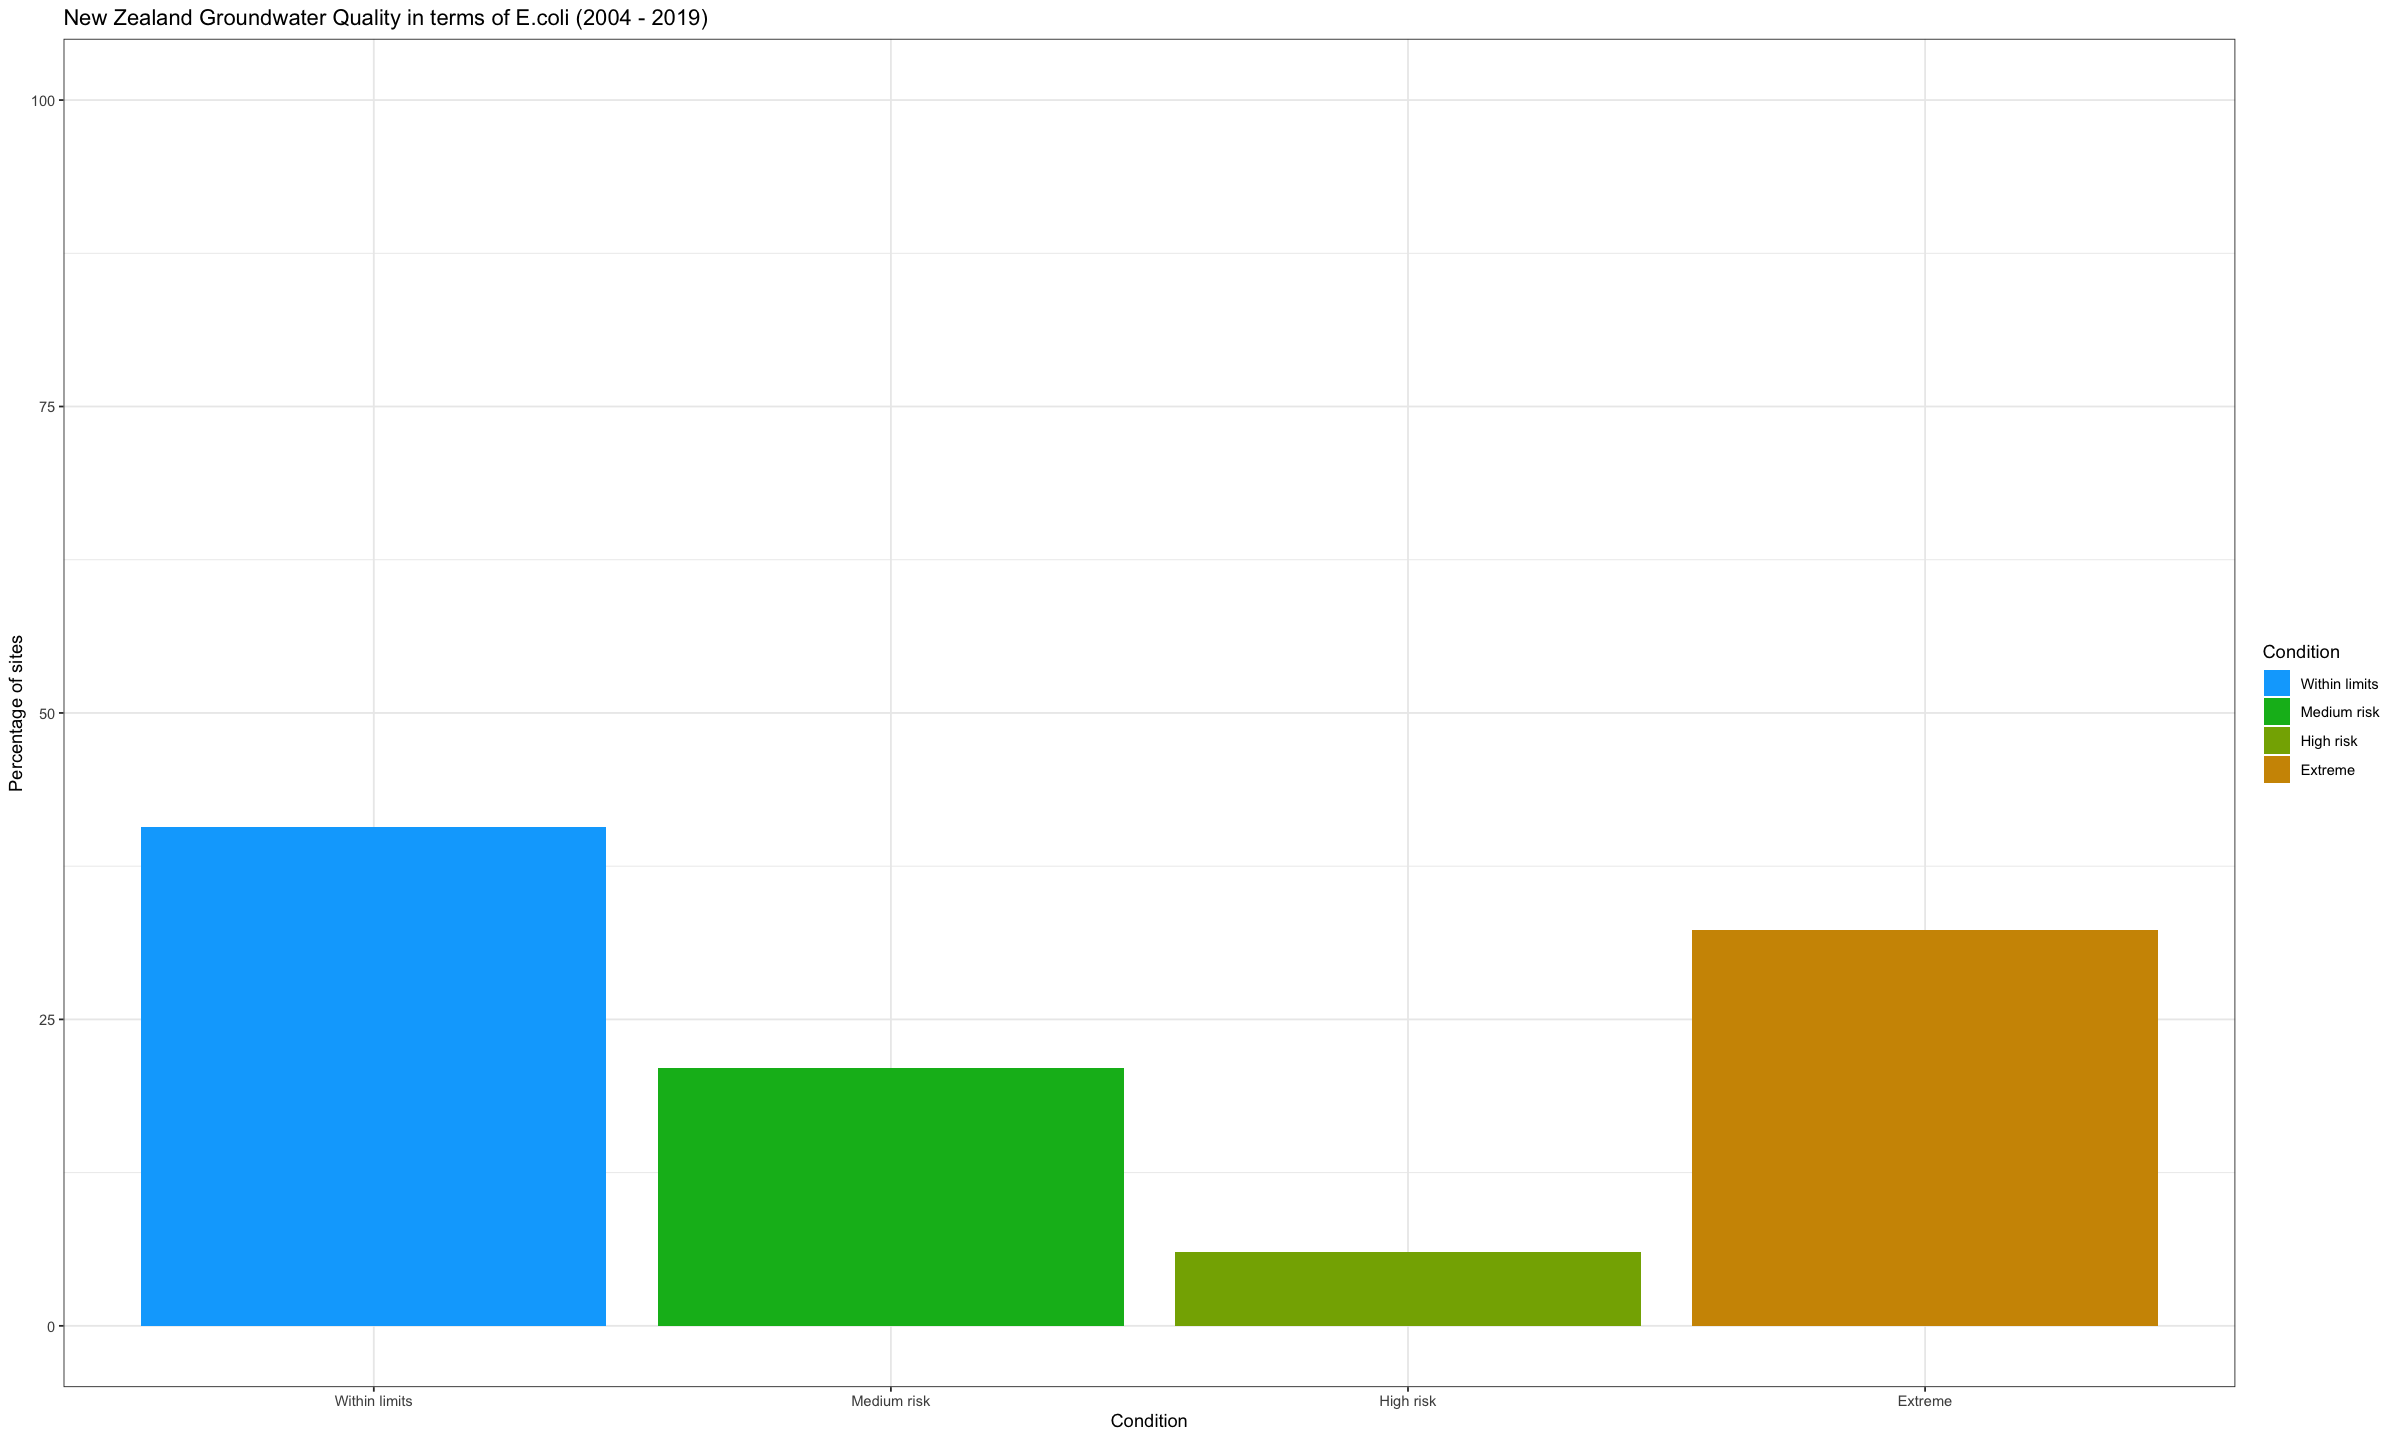

In [97]:
# Resize the size of the displayed visualisation
options(repr.plot.width = 20, repr.plot.height = 12)

# Create a data frame that contains the condition band, the count of sites per condition band, the proportion of sites under
# condition bands, and the indicator.
groundwater_ecoli_condition <- sites_quality %>% 
  filter(Indicator == "E.coli cfu/100ml") %>% 
  group_by(WellName) %>% 
  summarise(m = mean(MeanVal)) %>% 
  mutate(Condition = case_when(m == 0 ~ "No risk", 
                            m > 0 & m <= 1 ~ "Within limits",
                            m > 1 & m <= 1.6 ~ "Medium risk",
                            m > 1.6 & m <= 2 ~ "High risk",
                            TRUE ~ "Extreme")) %>% 
  group_by(Condition) %>% 
  summarize(Count = n()) %>% 
  mutate(prop=Count/sum(Count), Indicator="E.coli (cfu/100ml)")

# Change the order of the categorical variable instead in alphabetical order (condition band).
groundwater_ecoli_condition$Condition <- groundwater_ecoli_condition$Condition %>% 
    factor(levels = c("No risk", "Within limits", "Medium risk", "High risk", "Extreme"))

# Creates a visualisation that shows the proportion of sites under certain condition bands.
groundwater_ecoli_condition_plot <- groundwater_ecoli_condition %>% 
  ggplot(aes(x =  Condition, y = prop*100, fill = Condition))+
  geom_bar(stat="identity")+
  scale_fill_manual(values = c("#00ABFD", "#00B81F",
                               "#85AD00", "#CF9400")) +
  xlab("Condition") +
  ylab("Percentage of sites") +
  ggtitle("New Zealand Groundwater Quality in terms of E.coli (2004 - 2019)") +
  labs(fill = "Condition") +
  ylim(0, 100) + 
  theme_bw()
groundwater_ecoli_condition_plot

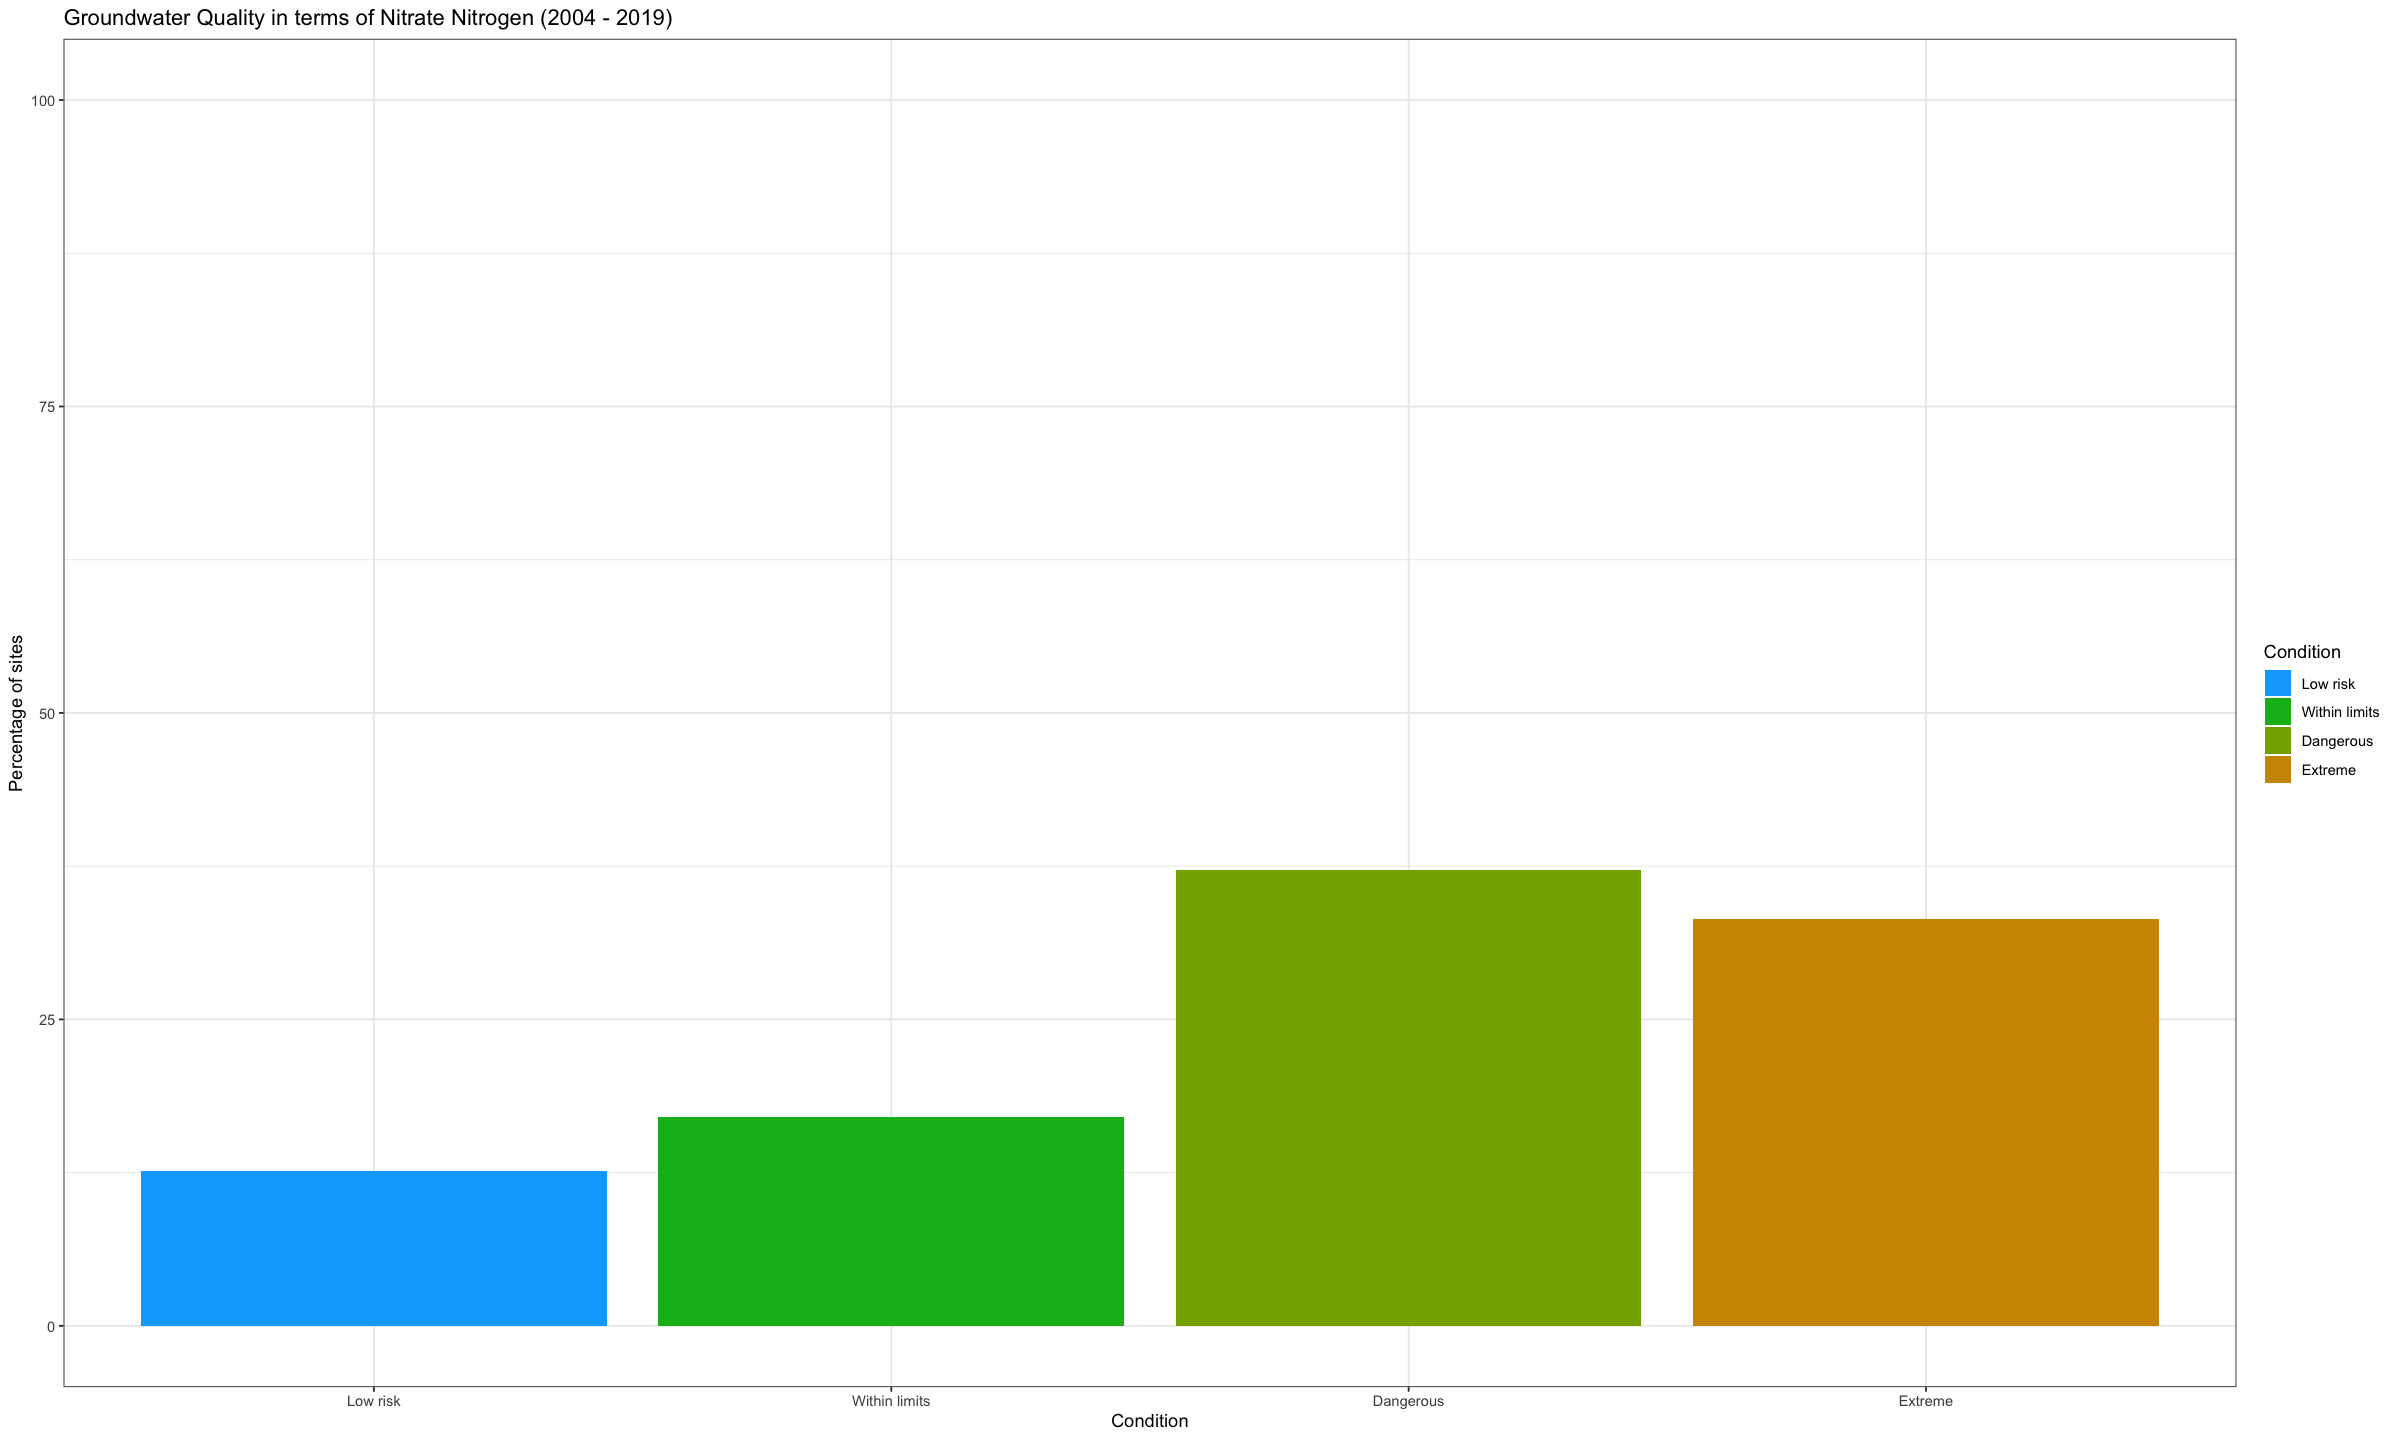

In [98]:
# Resize the size of the displayed visualisation
options(repr.plot.width = 20, repr.plot.height = 12)

# Create a data frame that contains the condition band, the count of sites per condition band, the proportion of sites under
# condition bands, and the indicator.
groundwater_nitro_condition <- sites_quality %>% 
  filter(Indicator == "Nitrate nitrogen g/m3") %>% 
  group_by(WellName) %>% 
  summarise(m = mean(MeanVal)) %>% 
  mutate(Condition = case_when(m >= 0 & m <= 6 ~ "Low risk", 
                            m > 6 & m <= 11.3 ~ "Within limits",
                            m > 11.3 & m <= 50 ~ "Dangerous",
                            TRUE ~ "Extreme")) %>% 
  group_by(Condition) %>% 
  summarize(Count = n()) %>% 
  mutate(prop=Count/sum(Count), Indicator = "Nitrate nitrogen (g/m3)")

# Change the order of the categorical variable instead in alphabetical order (condition band).
groundwater_nitro_condition$Condition <- groundwater_nitro_condition$Condition %>% 
    factor(levels = c("Low risk", "Within limits", "Dangerous", "Extreme"))

# Creates a visualisation that shows the proportion of sites under certain condition bands.
groundwater_nitro_condition_plot <- groundwater_nitro_condition %>%
  ggplot(aes(x =  Condition, y = prop*100, fill = Condition))+
  geom_bar(stat="identity") +
  scale_fill_manual(values = c("#00ABFD", "#00B81F",
                               "#85AD00", "#CF9400")) +
  xlab("Condition") +
  ylab("Percentage of sites") +
  ggtitle("Groundwater Quality in terms of Nitrate Nitrogen (2004 - 2019)") +
  labs(fill = "Condition") +
  ylim(0, 100) +
  theme_bw()
groundwater_nitro_condition_plot

<p style="text-align: justify"> The bar plots we created represent the proportion of sites allocated to different condition bands based on whether their average E. coli counts and nitrogen concentration (from 2004 to 2019) exceeded the threshold values. The threshold used for condition allocation is based on the values from different government agencies that we unified. </p>

<h2>River Quality (E. coli & Nitrogen)</h2>

In [99]:
# Gives an overview of river_ecoli such as columns, data types, the possible values, number of rows and columns.
river_ecoli %>% 
    glimpse()

Rows: 7,550
Columns: 69
$ field_1               <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…
$ measure_ab            <chr> "ECOLI", "ECOLI", "ECOLI", "ECOLI", "ECOLI", "EC…
$ measure               <chr> "E. coli", "E. coli", "E. coli", "E. coli", "E. …
$ units                 <chr> "cfu/100ml", "cfu/100ml", "cfu/100ml", "cfu/100m…
$ sof                   <chr> "WWL", "CWH", "WWL", "CWLk", "CWH", "WXL", "WWL"…
$ nzsegment             <dbl> 5122005, 4084132, 4085815, 4081484, 4083343, 506…
$ lat                   <dbl> -38.4616, -38.0824, -38.0795, -38.0440, -38.0465…
$ long                  <dbl> 177.8767, 176.2122, 177.1362, 176.3308, 176.9880…
$ s_id                  <chr> "GDC-00027", "EBOP-00010", "EBOP-00011", "EBOP-0…
$ n_obs                 <dbl> 54, 38, 38, 38, 38, 36, 36, 36, 37, 54, 55, 55, …
$ s                     <dbl> -177, 172, 16, 45, 46, 0, 7, 7, -20, 369, 16, -1…
$ var_s                 <dbl> 17951.6667, 6324.0000, 434.0000, 420.3333, 432.0…
$ d             

In [100]:
# Gives an overview of river_nitrogen such as columns, data types, the possible values, number of rows and columns.
# This allow us to select which relevant columns to select.
river_nitrogen %>% 
  glimpse()

Rows: 25,930
Columns: 69
$ field_1               <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…
$ measure_ab            <chr> "NH4N", "NH4N", "NH4N", "NH4N", "NH4N", "NH4N", …
$ measure               <chr> "Ammoniacal nitrogen", "Ammoniacal nitrogen", "A…
$ units                 <chr> "g/m3", "g/m3", "g/m3", "g/m3", "g/m3", "g/m3", …
$ sof                   <chr> "WWL", "WWL", "WWL", "WDL", "WDL", "WWL", "WDL",…
$ nzsegment             <dbl> 2038450, 2031444, 2038644, 2040105, 2035880, 203…
$ lat                   <dbl> -36.8889, -36.3450, -36.8949, -36.9623, -36.7320…
$ long                  <dbl> 174.5221, 174.7118, 174.5947, 174.8800, 174.6947…
$ s_id                  <chr> "ARC-00001", "ARC-00008", "ARC-00013", "ARC-0001…
$ n_obs                 <dbl> 116, 115, 118, 108, 118, 117, 120, 119, 118, 120…
$ s                     <dbl> -1496, 338, 821, -67, -1443, 424, -19, -581, -10…
$ var_s                 <dbl> 130591.6667, 168395.3333, 181606.3333, 141435.66…
$ d            

<p style="text-align: justify"> Glimpse displays information about river quality in terms of E. coli and nitrogen, with additional information about its physical location based on the columns appended to the original dataset when the latitude and longitude are converted. </p>

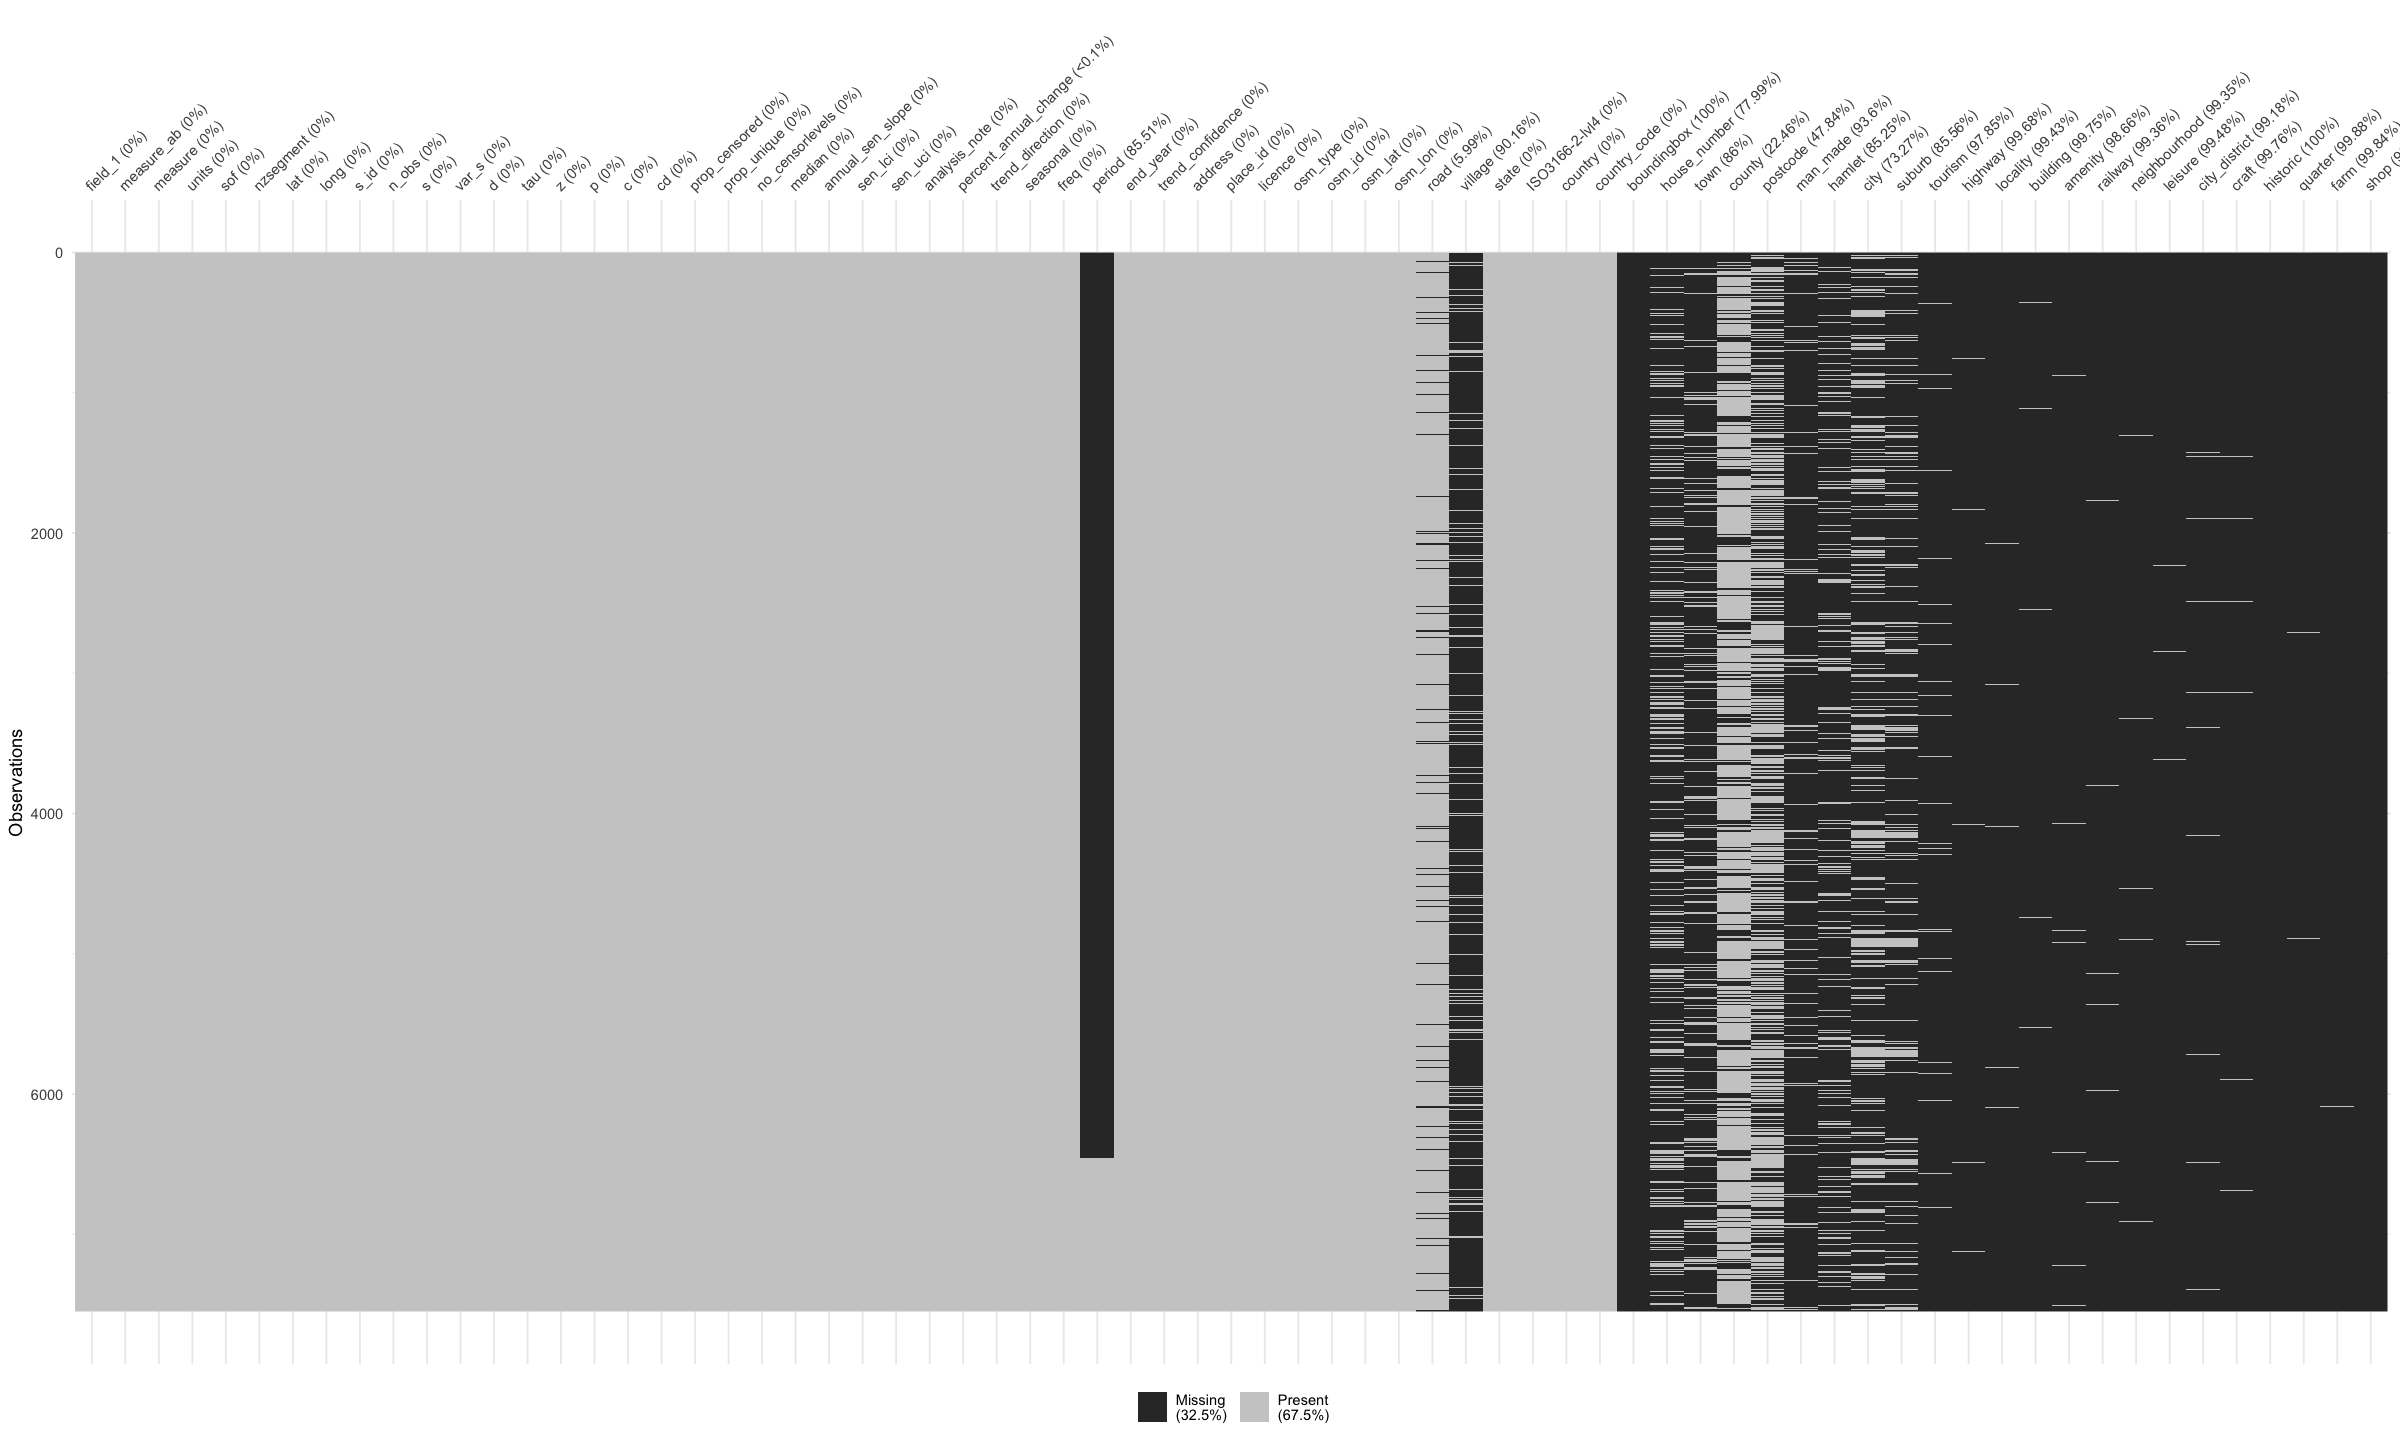

In [101]:
# Reads the entirety of river_ecoli and creates a plot to check if it contains missing data (NA).
river_ecoli %>% 
  vis_miss()

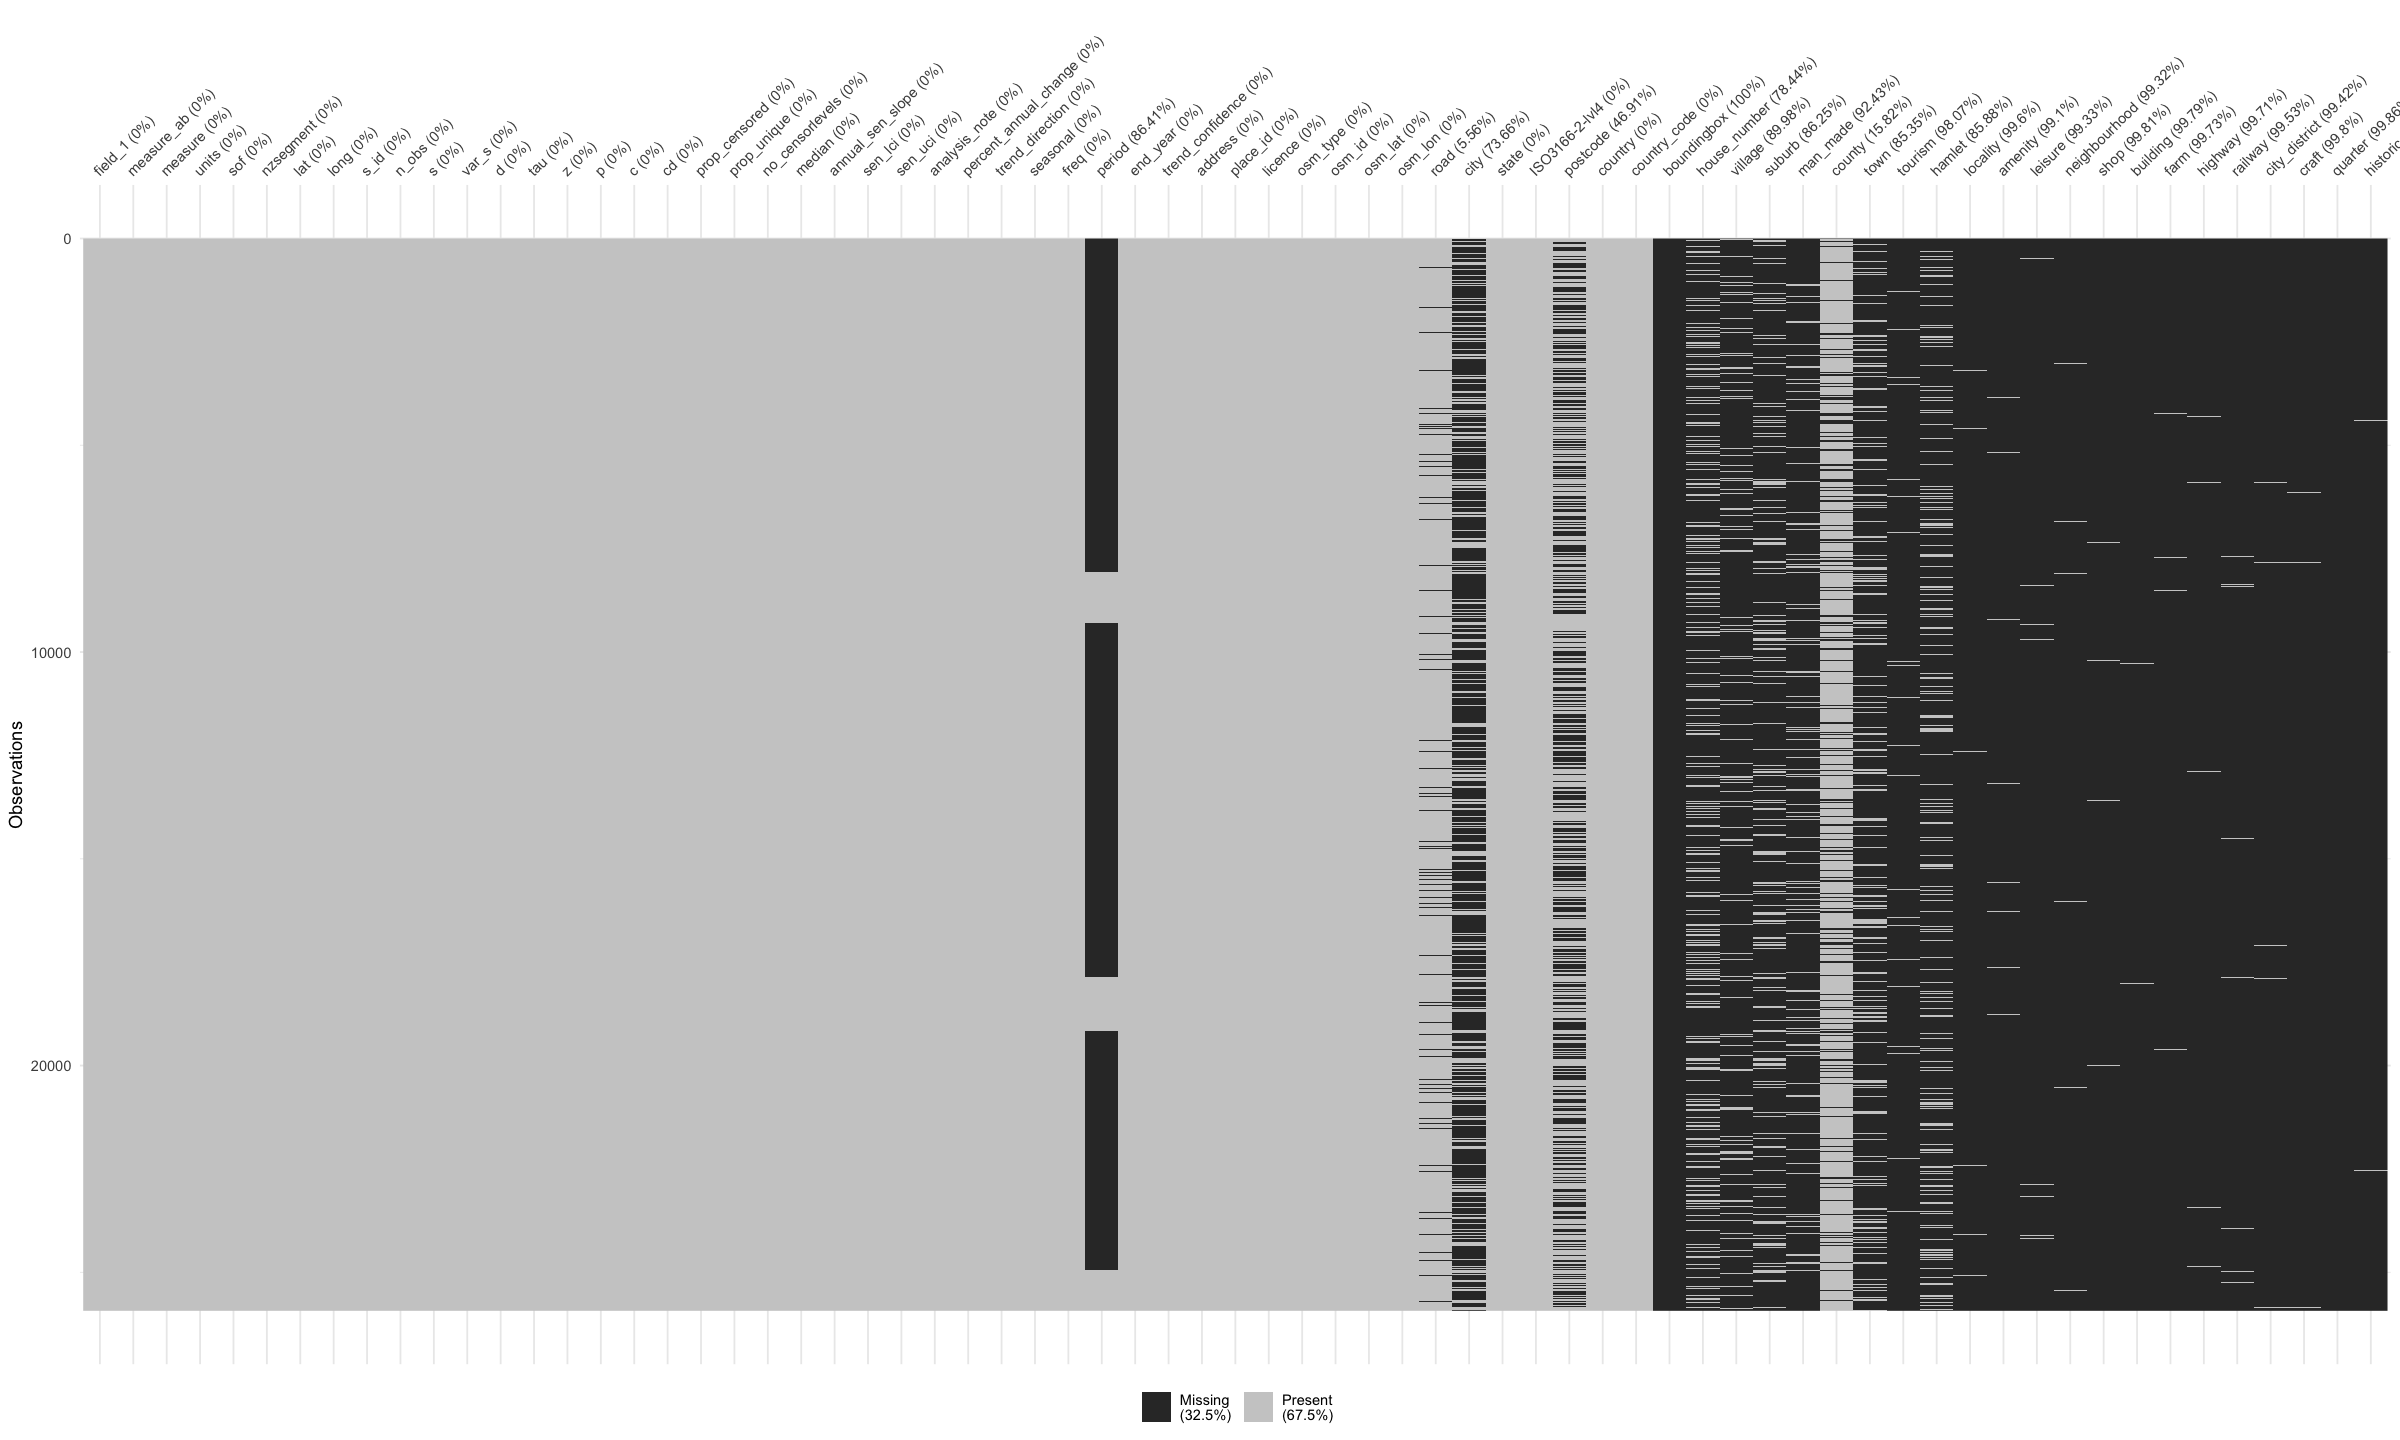

In [102]:
# Reads the entirety of river_nitrogen and creates a plot to check if it contains missing data (NA). 
river_nitrogen %>% 
  vis_miss(warn_large_data = FALSE)

<p style="text-align: justify"> Most of the missing values are attributed to the additional column about the river sites' location. The missing values for the period column are due to some of the records being the measurements observed in n-periods. </p>

In [103]:
# Takes the river_ecoli rename the columns, standardise the indicators, select the relevant columns and rows. 
new_river_ecoli <- river_ecoli %>% 
  rename(Region = state, Year = end_year, Indicator = measure, Median = median, Units = units, S_ID = s_id,
         Latitude = lat, Longitude = long) %>% 
  mutate(Indicator = "E.coli cfu/100ml") %>% 
  select(Region, Year, S_ID, Median, Indicator, Latitude, Longitude) %>% 
  filter(Year >= 2002, Year <= 2019)
new_river_ecoli %>% 
    head()

Region,Year,S_ID,Median,Indicator,Latitude,Longitude
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
Gisborne,2002,GDC-00002,80.5,E.coli cfu/100ml,-37.6746,178.3481
Gisborne,2002,GDC-00003,231.0,E.coli cfu/100ml,-38.2039,178.2558
Gisborne,2002,GDC-00004,297.0,E.coli cfu/100ml,-38.2923,178.2692
Gisborne,2002,GDC-00016,434.0,E.coli cfu/100ml,-38.6342,177.9682
Gisborne,2002,GDC-00020,219.0,E.coli cfu/100ml,-38.6683,178.0199
Gisborne,2002,GDC-00021,209.0,E.coli cfu/100ml,-38.4268,177.7224


In [104]:
# Takes river_nitrogen rename the columns, get the rows from 2002 to 2009 with ammoniacal nitrogen and nitrate(-nitrite) nitrogen
# as indicators, standardise the indicators, and select the necessary columns.
new_river_nitrogen <- river_nitrogen %>% 
  rename(Region = state, Year = end_year, Indicator = measure, Median = median, Units = units, S_ID = s_id,
         Latitude = lat, Longitude = long) %>% 
  filter(Year >= 2002, Year <= 2019, Indicator %in% c("Ammoniacal nitrogen", "Nitrate-nitrite nitrogen")) %>%
  mutate(Indicator = case_when(Indicator == "Ammoniacal nitrogen" ~ "Ammoniacal nitrogen g/m3",
                               TRUE ~ "Nitrate-nitrite nitrogen g/m3")) %>%
  select(Region, Year, S_ID, Median, Indicator, Latitude, Longitude)
new_river_nitrogen %>% 
    head()

Region,Year,S_ID,Median,Indicator,Latitude,Longitude
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
Auckland,2002,ARC-00001,0.0080,Ammoniacal nitrogen g/m3,-36.8889,174.5221
Auckland,2002,ARC-00008,0.0300,Ammoniacal nitrogen g/m3,-36.3450,174.7118
Waikato,2002,ARC-00009,0.0100,Ammoniacal nitrogen g/m3,-37.1955,174.9735
Auckland,2002,ARC-00013,0.0285,Ammoniacal nitrogen g/m3,-36.8949,174.5947
Auckland,2002,ARC-00015,0.0450,Ammoniacal nitrogen g/m3,-36.9623,174.8800
Auckland,2002,ARC-00016,0.0610,Ammoniacal nitrogen g/m3,-36.9557,174.8906


<p style="text-align: justify"> Similar to groundwater quality data, there are two measures of E. coli count and nitrogen concentration, which are equivalent so we proceed to use cfu/100ml and g/m3. Moreover, we concatenated the indicator and units. </p>

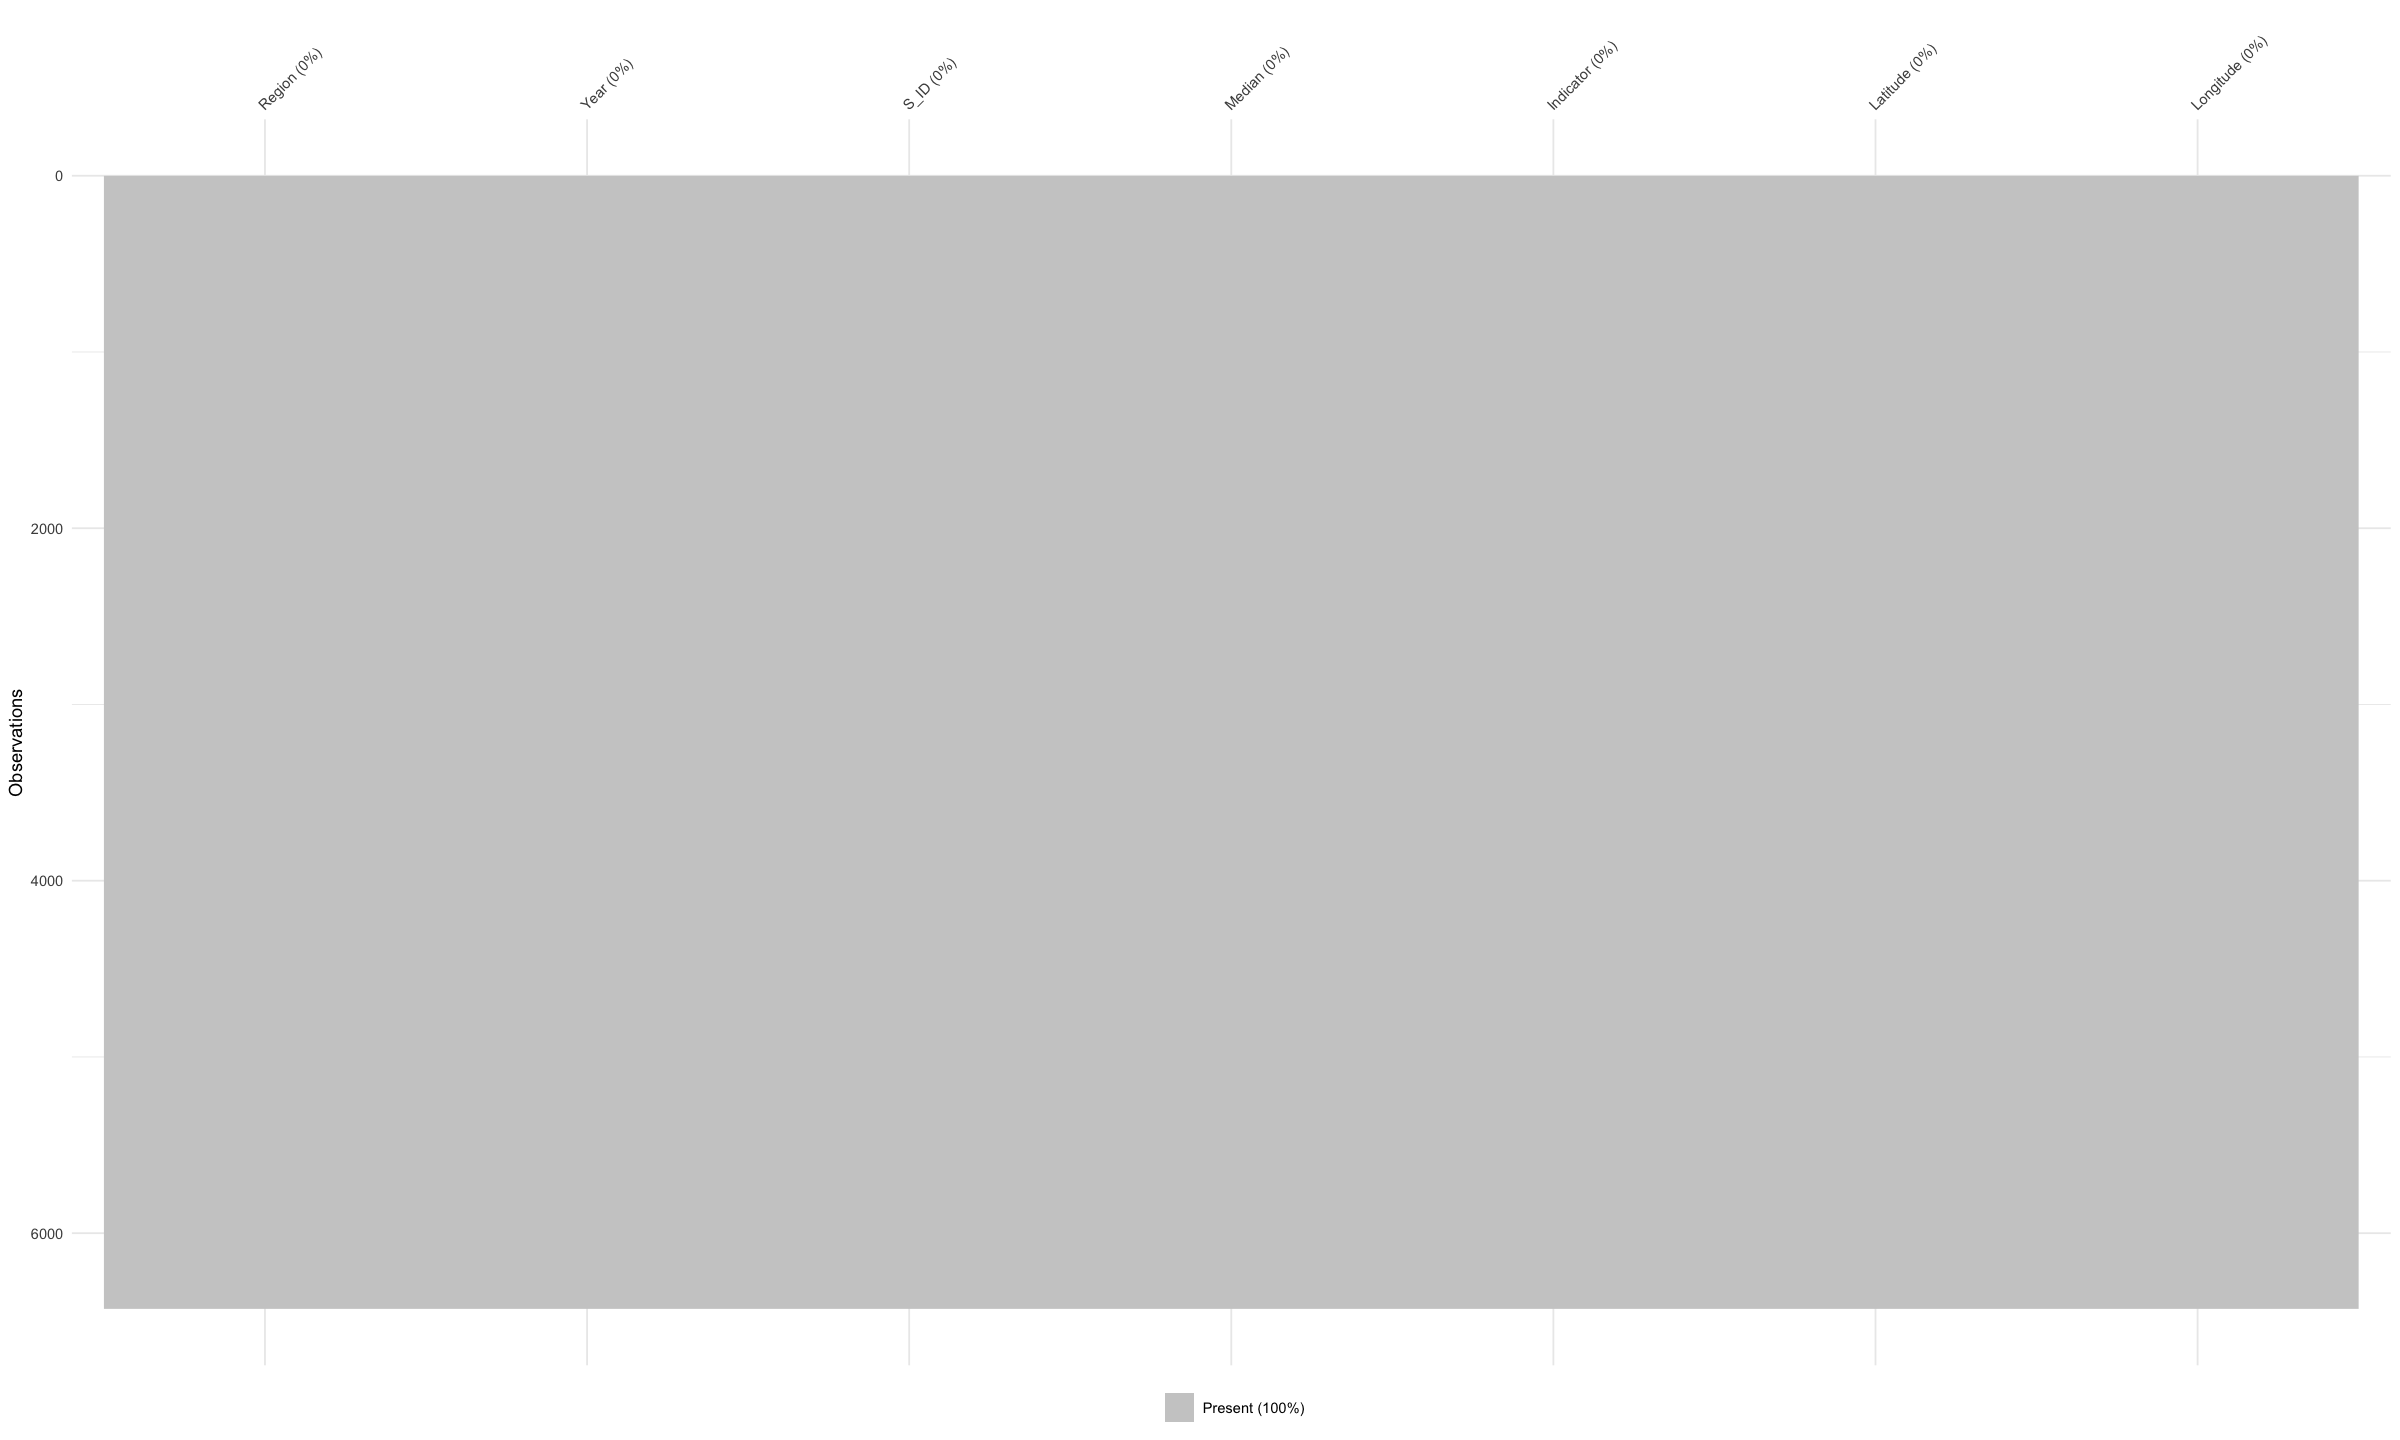

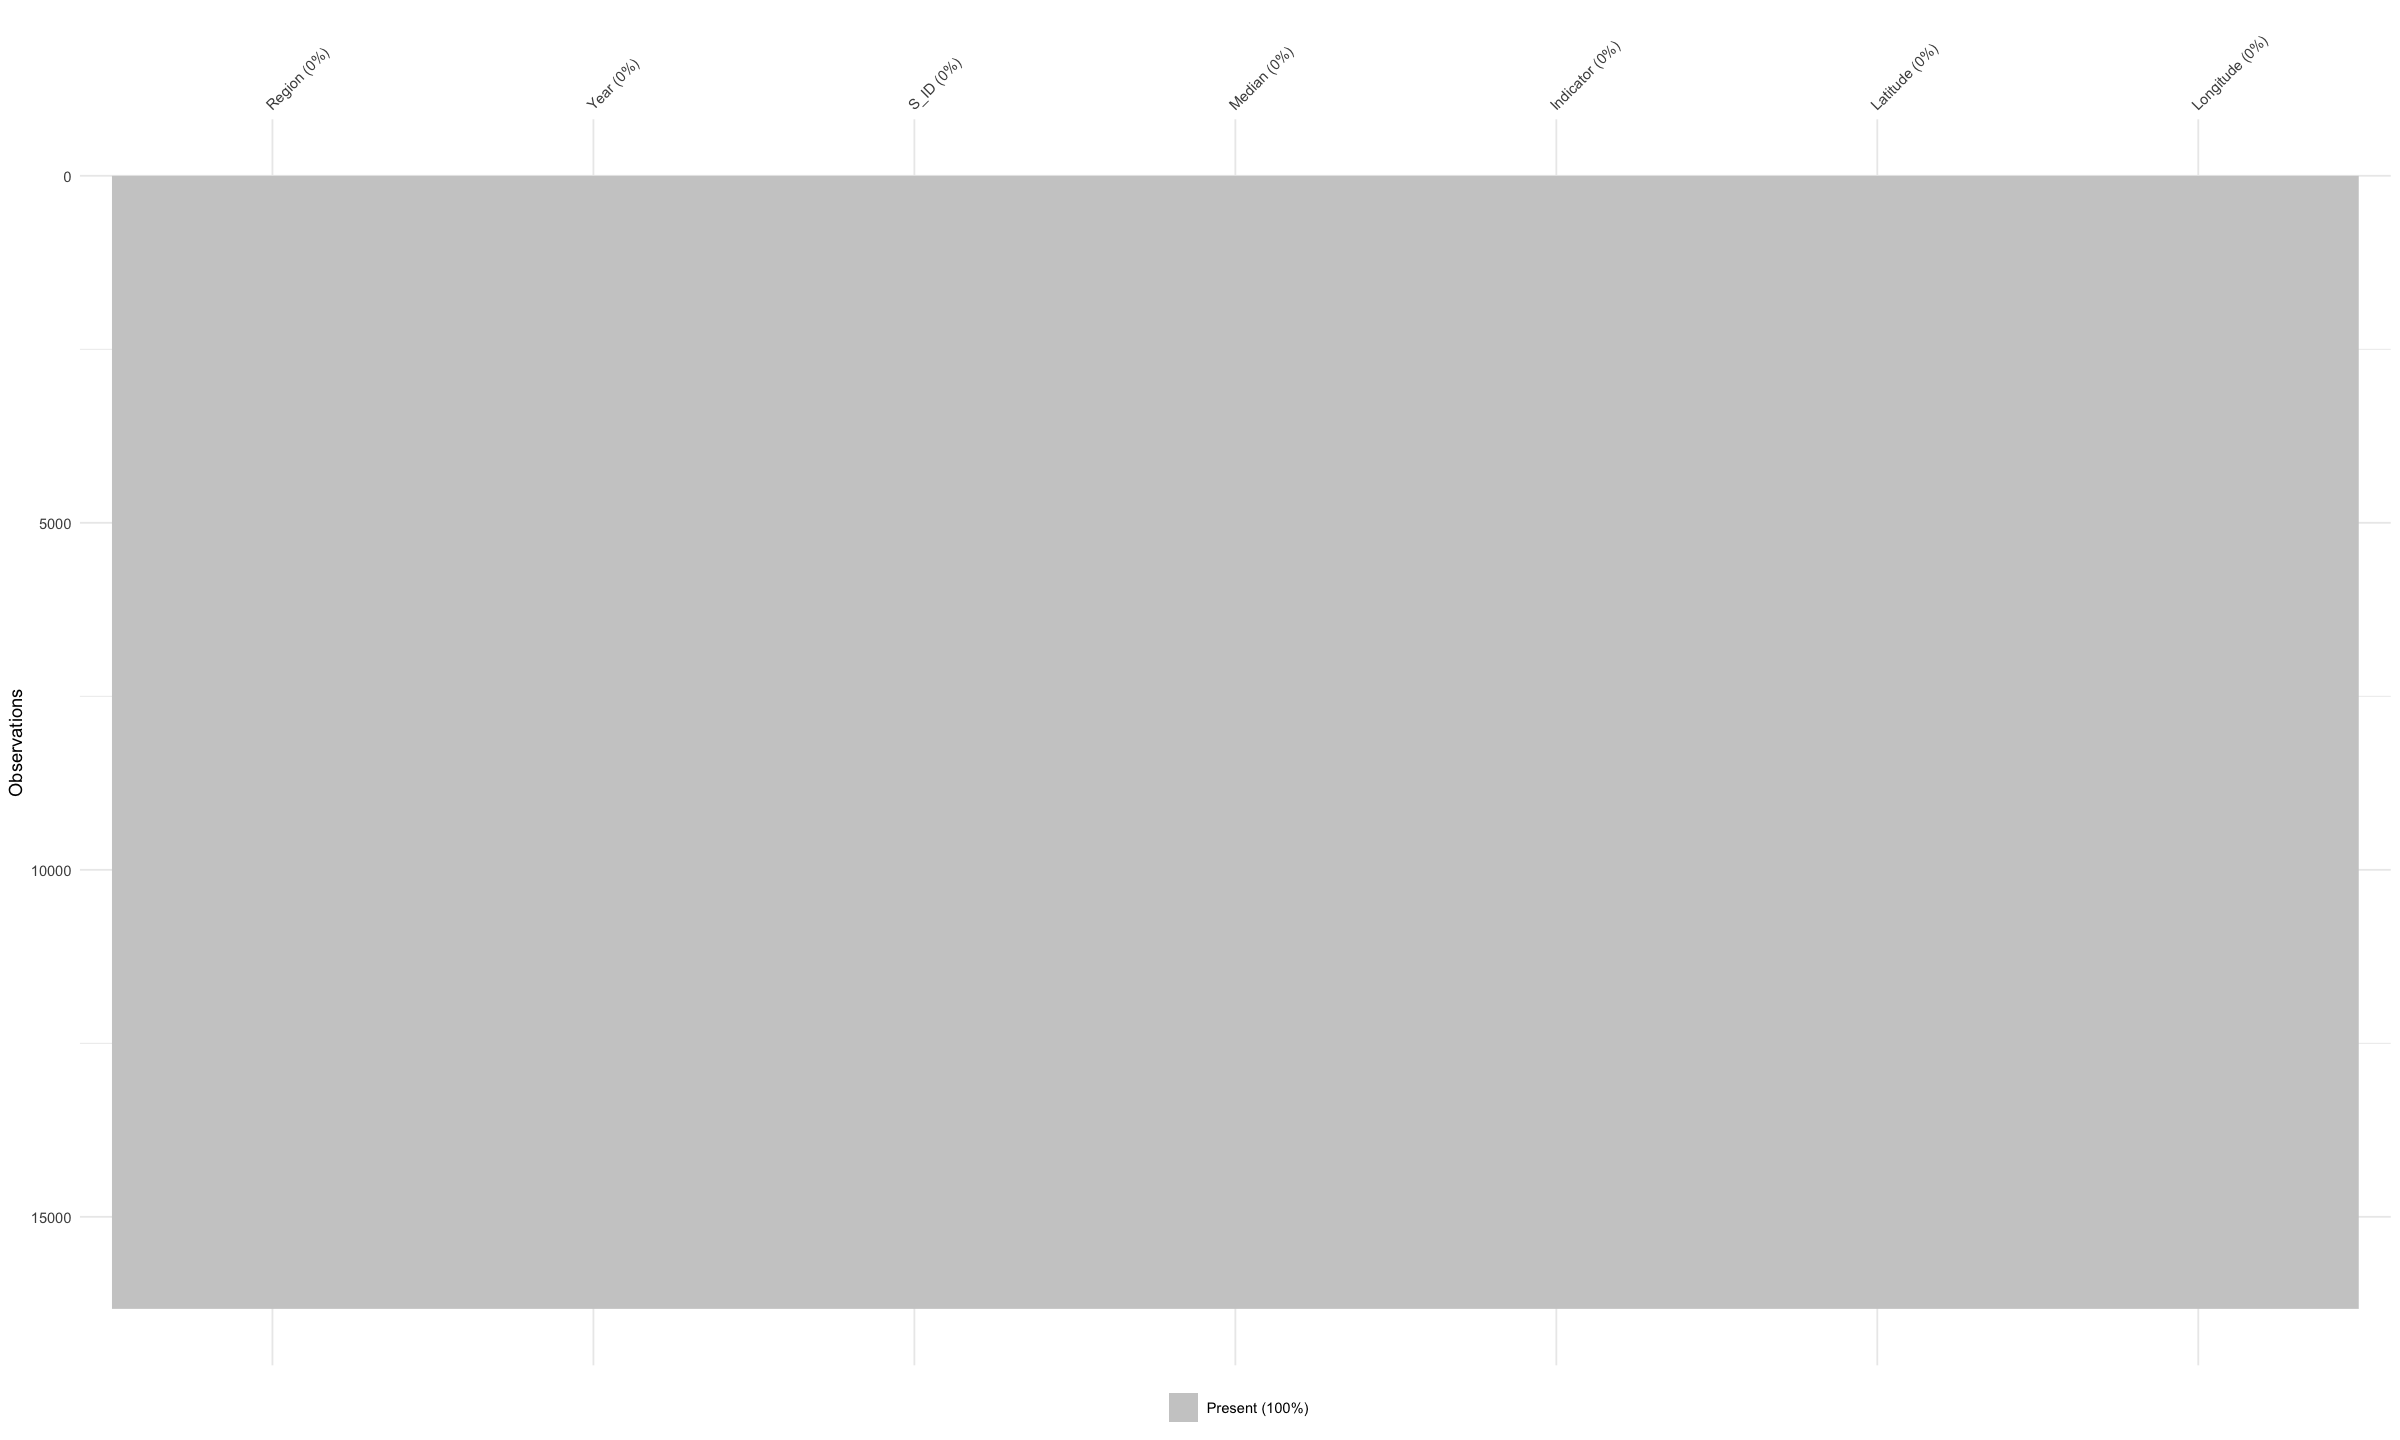

In [105]:
# Check for missing data again (NA)
new_river_ecoli %>% 
  vis_miss()

new_river_nitrogen %>% 
    vis_miss()

In [106]:
# Takes the new_river_ecoli select the relevant columns, group the rows by Region, Year, Site ID, and Indicator,
# summarise the mean for each site across NZ in specific year.
river_src_quality_ecoli <- new_river_ecoli %>% 
  select(Region, Year, S_ID, Median, Indicator) %>% 
  group_by(Region, Year, S_ID, Indicator) %>% 
  summarise(MeanVal = mean(Median))
river_src_quality_ecoli %>% 
    head()

`summarise()` has grouped output by 'Region', 'Year', 'S_ID'. You can override using the `.groups` argument.


Region,Year,S_ID,Indicator,MeanVal
<chr>,<dbl>,<chr>,<chr>,<dbl>
Auckland,2009,ARC-00014,E.coli cfu/100ml,2200
Auckland,2009,ARC-00015,E.coli cfu/100ml,1900
Auckland,2009,ARC-00018,E.coli cfu/100ml,2400
Auckland,2009,ARC-00019,E.coli cfu/100ml,385
Auckland,2010,ARC-00014,E.coli cfu/100ml,2100
Auckland,2010,ARC-00015,E.coli cfu/100ml,1600


In [107]:
# Takes the new_river_nitrogen select the relevant columns, group the rows by Region, Year, Site ID, and Indicator,
# summarise the mean for each site across NZ in specific year.
river_src_quality_nitrogen <- new_river_nitrogen %>% 
  select(Region, Year, S_ID, Median, Indicator) %>% 
  group_by(Region, Year, S_ID, Indicator) %>% 
  summarise(MeanVal = mean(Median))
river_src_quality_nitrogen %>% 
    head()

`summarise()` has grouped output by 'Region', 'Year', 'S_ID'. You can override using the `.groups` argument.


Region,Year,S_ID,Indicator,MeanVal
<chr>,<dbl>,<chr>,<chr>,<dbl>
Auckland,2002,ARC-00001,Ammoniacal nitrogen g/m3,0.0080
Auckland,2002,ARC-00001,Nitrate-nitrite nitrogen g/m3,0.0170
Auckland,2002,ARC-00003,Ammoniacal nitrogen g/m3,0.0440
Auckland,2002,ARC-00003,Nitrate-nitrite nitrogen g/m3,0.4630
Auckland,2002,ARC-00004,Ammoniacal nitrogen g/m3,0.0500
Auckland,2002,ARC-00004,Nitrate-nitrite nitrogen g/m3,0.2765


<p style="text-align: justify"> The data frame shows the mean E. coli counts and nitrogen concentration of each recorded river sites across New Zealand annually (from 2002 to 2019). </p>

In [108]:
# Takes the new_river_ecoli select the relevant columns about sites' coordinates, and then get the unique 
# entries of the river sites across NZ.
river_src_ecoli <- new_river_ecoli %>% 
  select(Region, S_ID, Latitude, Longitude) %>% 
  distinct()
river_src_ecoli %>% 
    head()

Region,S_ID,Latitude,Longitude
<chr>,<chr>,<dbl>,<dbl>
Gisborne,GDC-00002,-37.6746,178.3481
Gisborne,GDC-00003,-38.2039,178.2558
Gisborne,GDC-00004,-38.2923,178.2692
Gisborne,GDC-00016,-38.6342,177.9682
Gisborne,GDC-00020,-38.6683,178.0199
Gisborne,GDC-00021,-38.4268,177.7224


In [109]:
# Takes the new_river_nitrogen select the relevant columns about sites' coordinates, and then get the unique 
# entries of the river sites across NZ.
river_src_nitrogen <- new_river_nitrogen %>%
  select(Region, S_ID, Latitude, Longitude) %>%
  distinct()
river_src_nitrogen %>% 
    head()

Region,S_ID,Latitude,Longitude
<chr>,<chr>,<dbl>,<dbl>
Auckland,ARC-00001,-36.8889,174.5221
Auckland,ARC-00008,-36.3450,174.7118
Waikato,ARC-00009,-37.1955,174.9735
Auckland,ARC-00013,-36.8949,174.5947
Auckland,ARC-00015,-36.9623,174.8800
Auckland,ARC-00016,-36.9557,174.8906


<p style="text-align: justify"> The data frame contains the river site ID, the region where it is in, and its coordinates. </p>

In [110]:
# Join river_src_quality_ecoli and river_src_nitrogen to create river_quality dataframe.
river_quality <- river_src_quality_ecoli %>% 
  full_join(river_src_quality_nitrogen)
river_quality %>% 
    head()

# Join river_src_ecoli and river_src_nitrogen to create a data frame containing 
# all of the river sites and its coordinates across NZ.
river_src <- river_src_ecoli %>% 
  full_join(river_src_nitrogen) %>% 
  distinct()
river_src %>% 
    head()

Joining, by = c("Region", "Year", "S_ID", "Indicator", "MeanVal")


Region,Year,S_ID,Indicator,MeanVal
<chr>,<dbl>,<chr>,<chr>,<dbl>
Auckland,2009,ARC-00014,E.coli cfu/100ml,2200
Auckland,2009,ARC-00015,E.coli cfu/100ml,1900
Auckland,2009,ARC-00018,E.coli cfu/100ml,2400
Auckland,2009,ARC-00019,E.coli cfu/100ml,385
Auckland,2010,ARC-00014,E.coli cfu/100ml,2100
Auckland,2010,ARC-00015,E.coli cfu/100ml,1600


Joining, by = c("Region", "S_ID", "Latitude", "Longitude")


Region,S_ID,Latitude,Longitude
<chr>,<chr>,<dbl>,<dbl>
Gisborne,GDC-00002,-37.6746,178.3481
Gisborne,GDC-00003,-38.2039,178.2558
Gisborne,GDC-00004,-38.2923,178.2692
Gisborne,GDC-00016,-38.6342,177.9682
Gisborne,GDC-00020,-38.6683,178.0199
Gisborne,GDC-00021,-38.4268,177.7224


In [111]:
rq_overall_change <- river_quality %>% 
  spread(key = Indicator,
         value = MeanVal) %>% 
  na.omit() %>% 
  group_by(Year) %>% 
  summarise(MeanEcoli = mean(`E.coli cfu/100ml`),
            MeanNitrogen = mean(`Nitrate-nitrite nitrogen g/m3`),
            MeanAmmoniacal = mean(`Ammoniacal nitrogen g/m3`))
rq_overall_change

Year,MeanEcoli,MeanNitrogen,MeanAmmoniacal
<dbl>,<dbl>,<dbl>,<dbl>
2002,112.8000,0.3884000,0.02360000
2003,121.5000,0.4067000,0.02420000
2004,104.4167,0.3485833,0.02058333
2005,104.0000,0.3531667,0.02025000
2006,112.8571,0.3500000,0.02000000
2007,288.8265,0.5387350,0.05185513
2008,302.7379,0.5712725,0.04402823
2009,332.4908,0.5602879,0.04144737
2010,317.7669,0.5832005,0.03767951


In [112]:
## Creates a graph that displays the overall change in E. coli counts and nitrogen concentration in NZ from 2002-2019
# overall_rq <- highchart() %>% 
#   hc_yAxis_multiples(
#     list(lineWidth = 3, lineColor='blue', title=list(text="E.coli cfu/100ml")),
#     list(lineWidth = 3, lineColor="green", title=list(text="Nitrogen g/m3"))
#   ) %>% 
#   hc_add_series(data = rq_overall_change$MeanEcoli, color='blue', name = "E.coli") %>% 
#   hc_add_series(data = rq_overall_change$MeanNitrogen, color='green', name = "Nitrate-nitrite nitrogen", yAxis = 1) %>%
#   hc_add_series(data = rq_overall_change$MeanAmmoniacal, color='yellow', name = "Ammoniacal nitrogen", yAxis = 1) %>% 
#   hc_xAxis(categories = rq_overall_change$Year, title = list(text = "Year"))%>% 
#   hc_title(text = "Average E. coli Count, Nitrate-Nitrite and Ammonical Nitrogen Amount in NZ (2002 - 2019)")
# overall_rq

![overall_change](https://raw.githubusercontent.com/beuri97/data201_gp/waterq/water_quality/img/rq_overall.png)

<p style="text-align: justify"> Similar to groundwater quality, we created a times series plot that shows the average change in E. coli counts and nitrogen concentration, but from 2002 to 2019. Moreover, same approach is done here to display the image as this plot is also created using `highcharter`. </p>

Joining, by = c("Condition", "counts", "prop", "Indicator")
Joining, by = c("Condition", "counts", "prop", "Indicator")


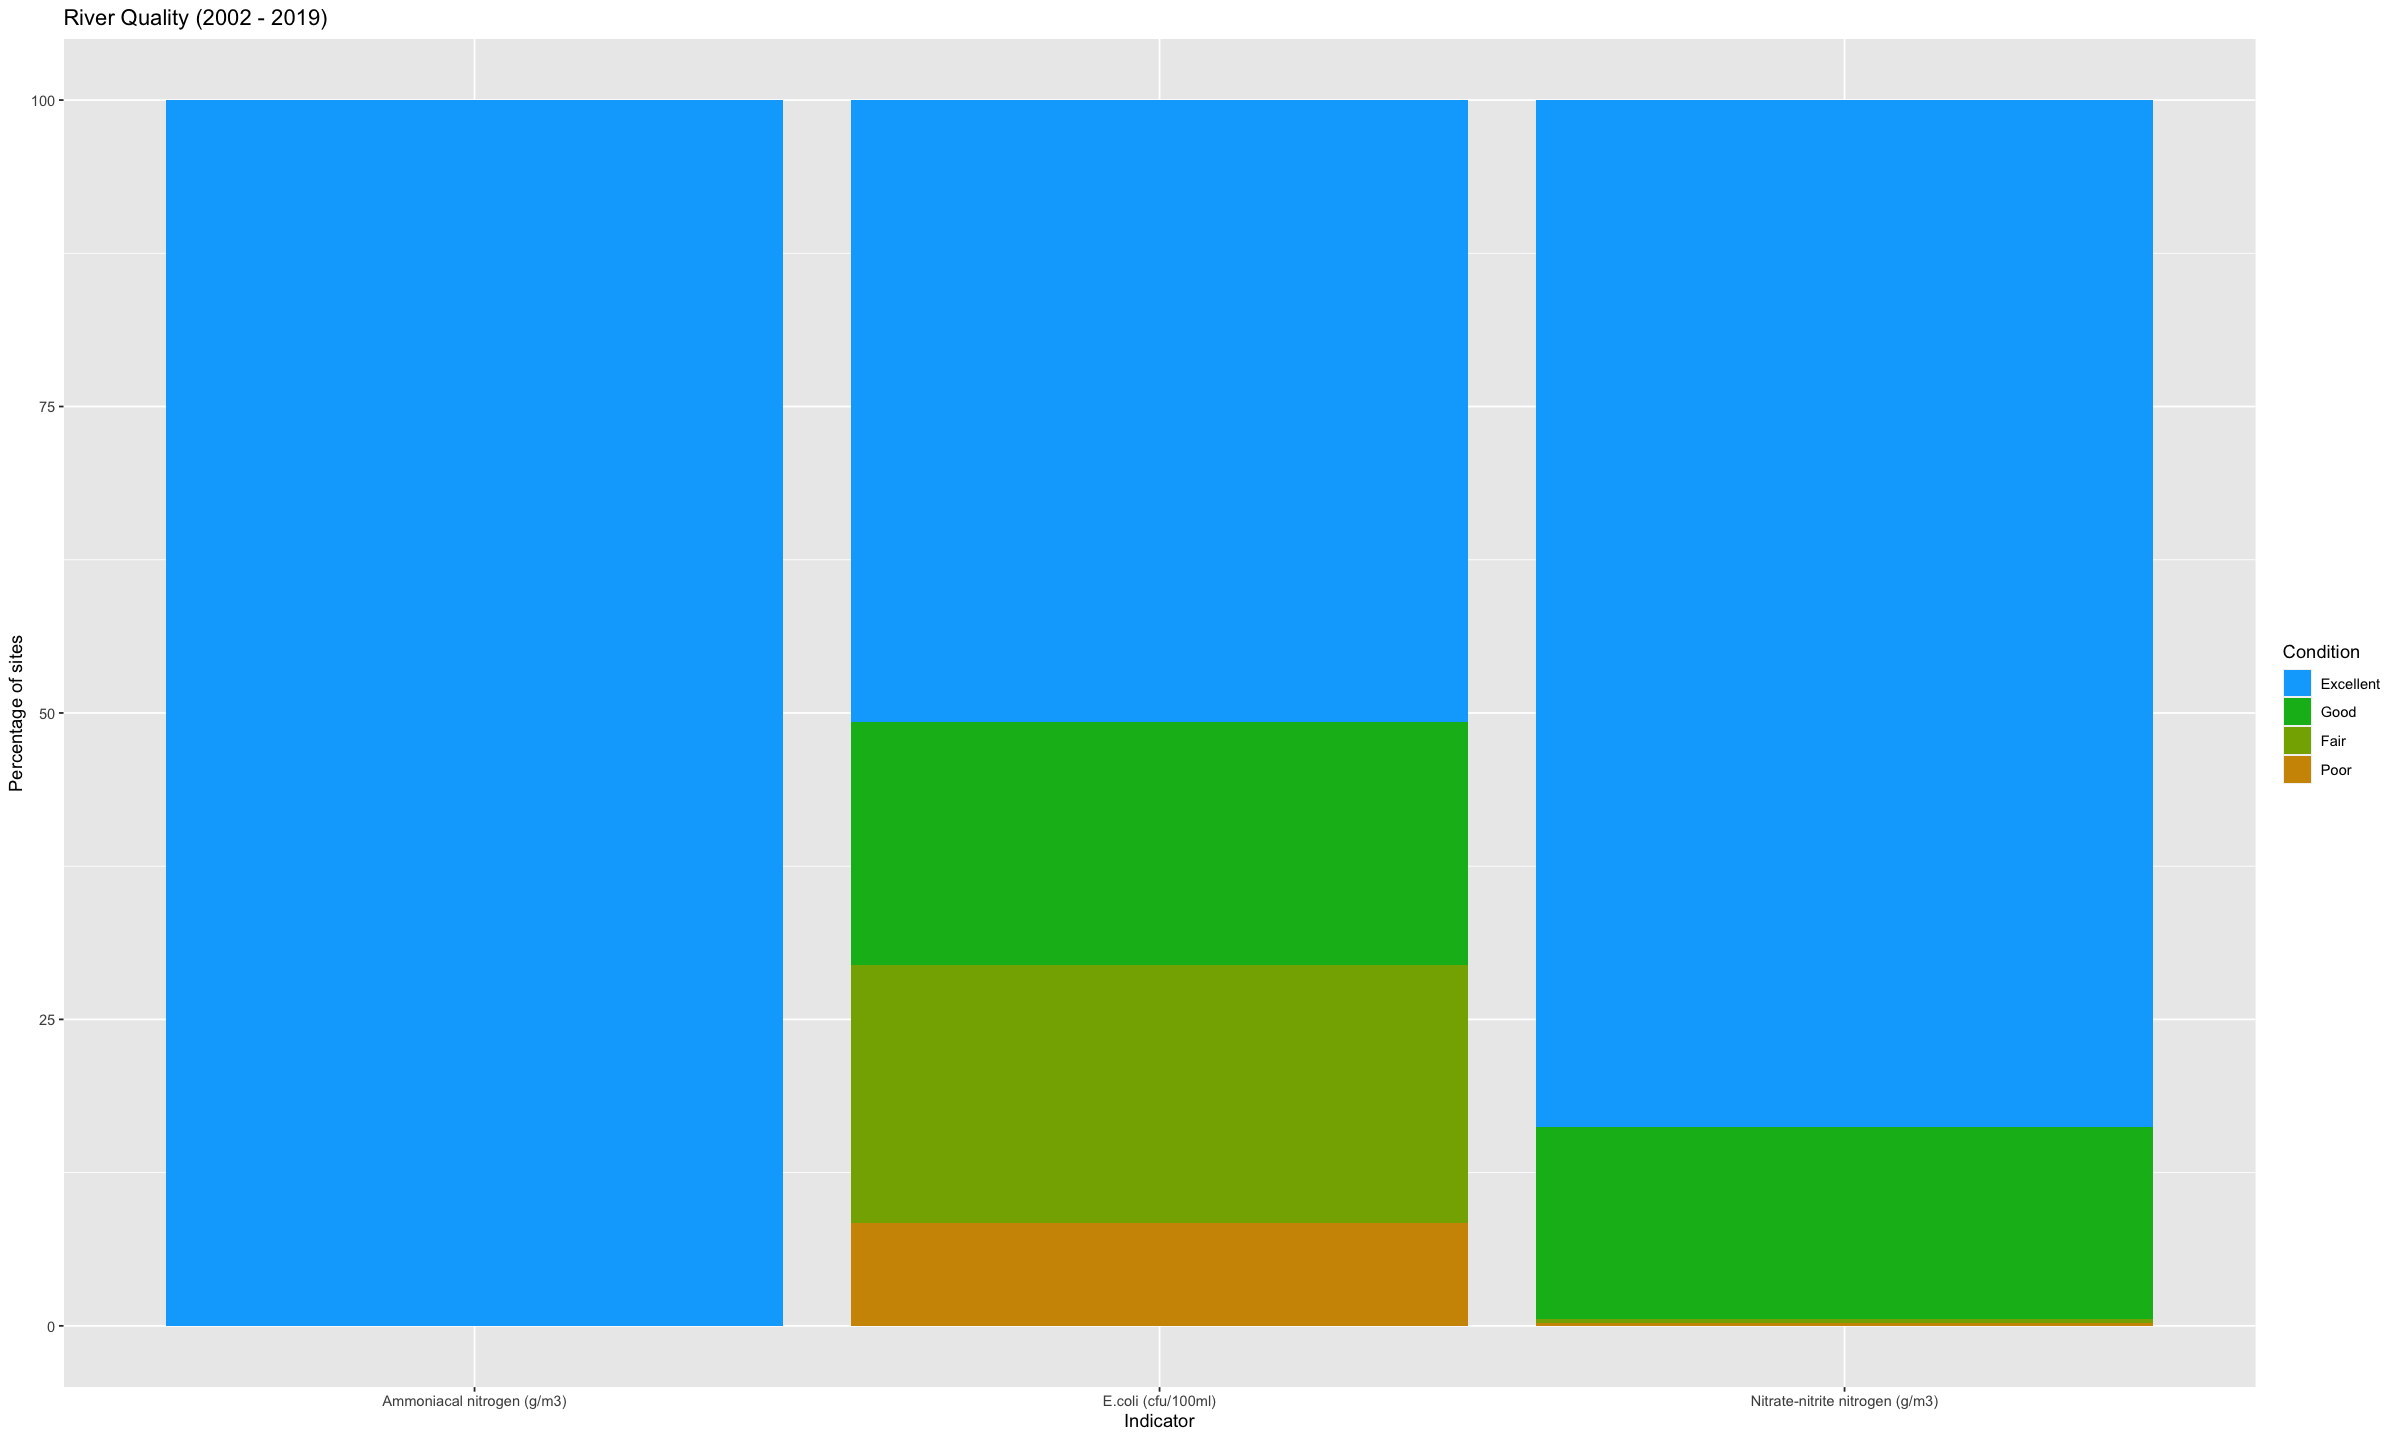

In [113]:
# Resize the size of the displayed visualisation
options(repr.plot.width = 20, repr.plot.height = 12)

# Create a data frame that contains the condition band, the count of sites per condition band, the proportion of sites 
# under condition bands, and the indicator (E. coli and nitrogen).
sitepropecoli <- river_quality %>% 
  filter(Indicator == "E.coli cfu/100ml") %>% 
  group_by(S_ID) %>% 
  summarise(m = mean(MeanVal)) %>% 
  mutate(Condition = case_when(m <= 130 ~ "Excellent",
                            m > 130 & m <= 260 ~ "Good",
                            m > 260 & m <= 540 ~ "Fair",
                            TRUE ~ "Poor")) %>% 
  group_by(Condition) %>% 
  summarise(counts = n()) %>% 
  mutate(prop = counts/sum(counts),
         Indicator = rep(c("E.coli (cfu/100ml)"), 4))

sitepropnitrate <- river_quality %>% 
  filter(Indicator == "Nitrate-nitrite nitrogen g/m3") %>% 
  group_by(S_ID) %>% 
  summarise(m = mean(MeanVal)) %>% 
  mutate(Condition = case_when(m >= 0 & m <= 1 ~ "Excellent", 
                            m > 1 & m <= 5.65 ~ "Good",
                            m > 5.65 & m <= 11.3 ~ "Fair",
                            TRUE ~ "Poor")) %>% 
  group_by(Condition) %>% 
  summarise(counts = n()) %>% 
  mutate(prop = counts/sum(counts),
         Indicator = rep(c("Nitrate-nitrite nitrogen (g/m3)"), 4))

siteammoniacal <- river_quality %>% 
  filter(Indicator == "Ammoniacal nitrogen g/m3") %>% 
  group_by(S_ID) %>% 
  summarise(m = mean(MeanVal)) %>% 
  mutate(Condition = case_when(m >= 0 & m <= 1 ~ "Excellent", 
                            m > 1 & m <= 5.65 ~ "Good",
                            m > 5.65 & m <= 11.3 ~ "Fair",
                            TRUE ~ "Poor")) %>% 
  group_by(Condition) %>% 
  summarise(counts = n()) %>% 
  mutate(prop = counts/sum(counts),
         Indicator = rep(c("Ammoniacal nitrogen (g/m3)"), 1))

# Join all of the resulting data frame to create another data frame that contains all of the information about the proportions
# and counts of river sites under certain condition bands.
sitepropnitrogen <- sitepropnitrate %>% 
  full_join(siteammoniacal)

full_river <- sitepropecoli %>% 
  full_join(sitepropnitrogen)

# Change the order of the categorical variable instead in alphabetical order (condition band).
full_river$Condition <- factor(full_river$Condition, levels = c("Excellent", "Good", "Fair", "Poor"))

# Creates a visualisation that shows the proportion of sites under certain condition bands.
river_condition_plot <- full_river %>%
  ggplot(aes(x = Indicator, y = prop*100, fill = Condition)) +
  geom_bar(position = "stack", stat = "identity") +
  scale_fill_manual(values = c("#00ABFD", "#00B81F",
                            "#85AD00", "#CF9400")) + 
  ylab("Percentage of sites") +
  ggtitle("River Quality (2002 - 2019)") +
  ylim(0, 100)
river_condition_plot

<p style="text-align: justify"> The idea for the bar plot is the same as the one created for groundwater quality where the plot represents the proportion of sites allocated to different condition bands based on whether their average E. coli counts and nitrogen concentration exceeded certain threshold values. </p>

<h2> Saving the cleaned data frames as CSV files </h2>

In [114]:
## Generate CSV files
# write_csv(sites_quality, "groundwater_quality.csv")
# write_csv(sites, "groundwater_sites.csv")

# write_csv(river_quality, "river_quality.csv")
# write_csv(river_src, "river_srcs.csv")

<h2> GitHub Link to Access the Produced Datasets </h2>

https://github.com/beuri97/data201_gp

<p style="text-align: justify"> The master branch of our GitHub repository contains two folders and a README file. The data folder consists of all the wrangled and tidied datasets, while the image folder is the storage for the image of our dataset schema. Lastly, the README file contains all the information about the variables of the dataset we produced. </p>